<a href="https://colab.research.google.com/github/dote7ant/Penalty-regressions/blob/master/Penalty_regressions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis to find factors that affect housing prices and using these factors make a prediction of house prices.

####Introduction.

Working as a Data scientist for Hass Consulting Company, we have been tasked in finding out the factors that affect the overall price of a house. Using the above identified factors we will create a model to predict accurately the prices of a house.

1. Defining the question.




As a Data Scientist, you work for Hass Consulting Company which is a real estate leader with over 25 years of experience. You have been tasked to study the factors that affect housing prices using the given information on real estate properties that was collected over the past few months. Later onwards, create a model that would allow the company to accurately predict the sale of prices upon being provided with the predictor variables. 

2. Defining the metrics for succes.

Perform the necessary EDA procedures once this is done begin by finding the Root Mean Squared Error (RMSE) for the linear model. We will use this model as our baseline and compare every other models' RMSE to this and rank the models in descending order of their performance. We will then challenge our solutions by starting of with feature extraction and repeat the same processes and asses the performance of these new models to the previous ones. The success criteria is being able to make a prediction for each model and calculate the RMSE's of each model. We will then perform a polynomial regression and compare its RMSE value to all our models.



3. Understanding the context.

This data has been acquired from Hass consultant where we work as Data scientists. Hass Consultant has over 25 years of experience in the housing sector thus the features in the can be considered usefull and important.

4. Recording the experimental design

We will be using the following 5 regression models. This will allow us to assess the suitability of each of the models and their appropriateness in solving the given problem.

1. Multiple linear regression
2. Quantile regression
3. Ridge regression
4. Lasso regression
5. Elastic Net regression
6. Polynomial Regression (test accuracy of our models)

## 1. Reading data and Importing libraries.

In [253]:
# here we import all the necessary libraries we will need for the task
import pandas as pd
import pandas_profiling
import numpy as np

import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn import linear_model
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet, LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, accuracy_score, confusion_matrix, mean_absolute_error
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn import metrics
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.ensemble import RandomForestClassifier

import statsmodels.formula.api as smf

import warnings
warnings.filterwarnings("ignore")

Loading the data set

In [ ]:
# we will use pandas for this 
url = "http://bit.ly/IndependentProjectWeek7Dataset"
df = pd.read_csv(url)
df.head()

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

## 2. Checking the data.

In [ ]:
# checking the columns to determine whether we will rename any of them
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

Below is the dataset glossary:

* Id 
* price  - Price of the house
* bedrooms - Number of Bedrooms
* bathrooms - Number of Bathrooms
* sqft_living - Square feet area of living area
* sqft_lot  - Square feet area of parking Layout
* floors - Number of Floors
* waterfront - Whether waterfront is there or not
* view - Number of Views
* grade - Grades
* sqft_above
* sqft_basement - Square feet area off basement
* yr_built - Year the house is built
* yr_renovated - Year the house is renovated
* zipcode - zipcode os the house
* lat : Latitude of the house
* lon : Longitude of the house
* sqft_living15
* sqft_lot15




In [ ]:
# preview the first 5 
print("These are the first 5 rows:\n")
df.head()


These are the first 5 rows:



id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
0  7129300520  221900.0         3  ... -122.257           1340        5650
1  6414100192  538000.0         3  ... -122.319           1690        7639
2  5631500400  180000.0         2  ... -122.233           2720        8062
3  2487200875  604000.0         4  ... -122.393           1360        5000
4  1954400510  510000.0         3  ... -122.045           1800        7503

[5 rows x 20 columns]

In [ ]:
# preview the last 5 rows
print("These are the last 5 rows:\n")
df.tail()

These are the last 5 rows:



id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
21608   263000018  360000.0         3  ... -122.346           1530        1509
21609  6600060120  400000.0         4  ... -122.362           1830        7200
21610  1523300141  402101.0         2  ... -122.299           1020        2007
21611   291310100  400000.0         3  ... -122.069           1410        1287
21612  1523300157  325000.0         2  ... -122.299           1020        1357

[5 rows x 20 columns]

From the previews we can see that all the columns are in the data type format for numbers. Next we check whether this observation is true.

In [ ]:
# check the data types for the columns
print("The data types in our data set for various columns is as shown below:\n")
df.info()
print("-----------------------------------------------------------------------")

The data types in our data set for various columns is as shown below:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   price          21613 non-null  float64
 2   bedrooms       21613 non-null  int64  
 3   bathrooms      21613 non-null  float64
 4   sqft_living    21613 non-null  int64  
 5   sqft_lot       21613 non-null  int64  
 6   floors         21613 non-null  float64
 7   waterfront     21613 non-null  int64  
 8   view           21613 non-null  int64  
 9   condition      21613 non-null  int64  
 10  grade          21613 non-null  int64  
 11  sqft_above     21613 non-null  int64  
 12  sqft_basement  21613 non-null  int64  
 13  yr_built       21613 non-null  int64  
 14  yr_renovated   21613 non-null  int64  
 15  zipcode        21613 non-null  int64  
 16  lat            21613 no

We can observe in the non -null count that there are 21613 non-null values this means that in each column there is an equal count of values.

In [ ]:
# check number of rows and columns in the data set
df.shape
print("There are", df.shape[0], "rows and", df.shape[1], "columns in our data set.")

There are 21613 rows and 20 columns in our data set.


We note that we have a total of 21613 rows and we had found that there are 21613 non-null counts for all our columns. This tells us that there are no columns with empty values or missing values. We confirm this observation.

In [ ]:
# check for missing values
df.isnull().sum()

id               0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

We can clearly observe that there are no missing values.

In [ ]:
# check for duplicates
print("There are duplicate values in our data set:", df.duplicated().any())

There are duplicate values in our data set: True


There are duplicates in our data set.

In [ ]:
# show the values that are duplicates except the first occurence
df[df.duplicated()]

id     price  bedrooms  ...     long  sqft_living15  sqft_lot15
3951   1825069031  550000.0         4  ... -122.088           2520       14789
14983  6308000010  585000.0         3  ... -122.172           2290        7984
20054  8648900110  555000.0         3  ... -122.093           1880        3078

[3 rows x 20 columns]

The duplicates will be dropped later on.

In [ ]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

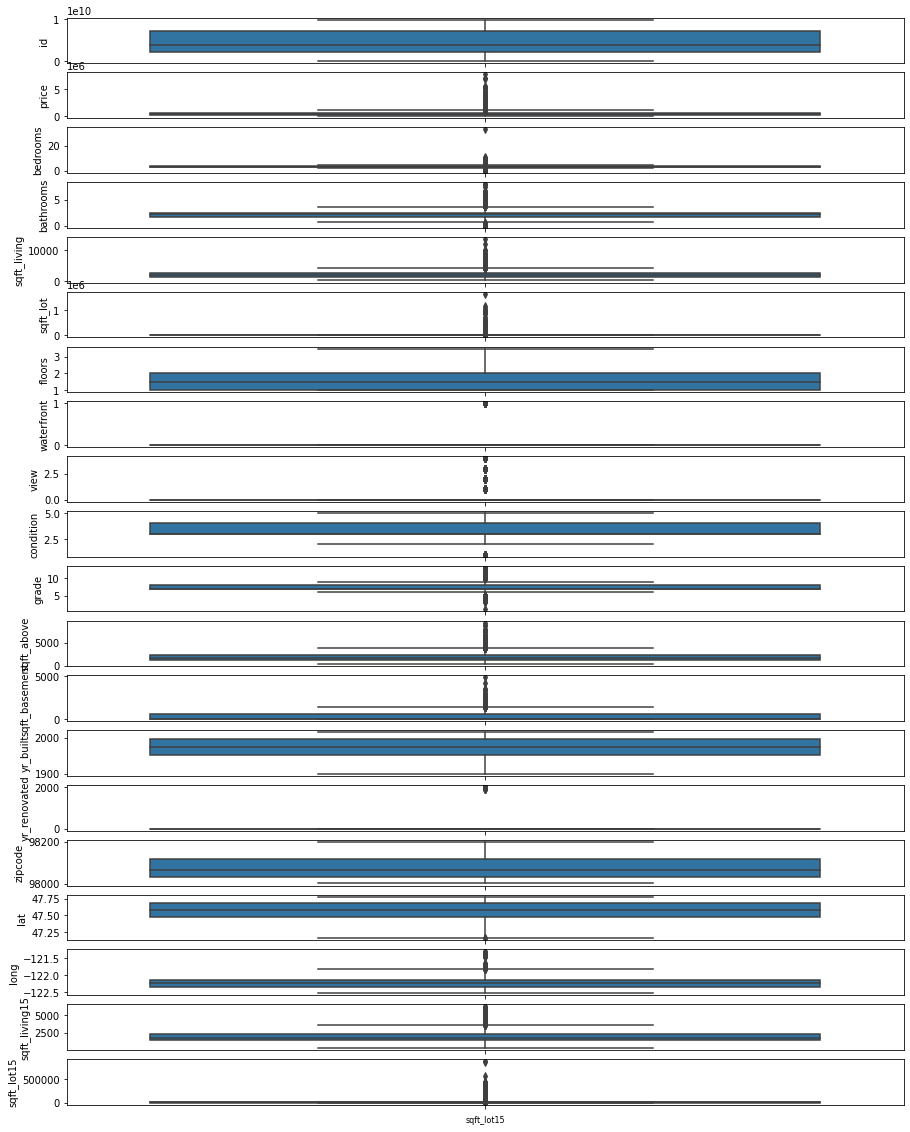

In [ ]:
# using boxplots find outliers
col_names= df.columns
fig, ax = plt.subplots(len(col_names), figsize=(15,20))

for i, col_val in enumerate(col_names):

    sns.boxplot(y=df[col_val], ax=ax[i])
    
    ax[i].set_xlabel(col_val, fontsize=8)

plt.show()

For some reason our boxplots are not showing even after debugging so we go with another method of finding outliers.

In [ ]:
# we the quantile information to get outliers any figure that is less than this (Q1 - 1.5 * IQR)))  is a suspected outlier and any figure
# greater than this ( (Q3 + 1.5 * IQR)))  is a suspected outlier
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1
a = (df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))
a
# note when we have False there is no suspected outlier and if the value is True we have an outlier.

id  price  bedrooms  ...   long  sqft_living15  sqft_lot15
0      False  False     False  ...  False          False       False
1      False  False     False  ...  False          False       False
2      False  False     False  ...  False          False       False
3      False  False     False  ...  False          False       False
4      False  False     False  ...  False          False       False
...      ...    ...       ...  ...    ...            ...         ...
21608  False  False     False  ...  False          False       False
21609  False  False     False  ...  False          False       False
21610  False  False     False  ...  False          False       False
21611  False  False     False  ...  False          False       False
21612  False  False     False  ...  False          False       False

[21613 rows x 20 columns]

In [ ]:
# first we check which columns have outliers
b = a.any() == True
print("These are the columns with outliers:\n",b)

# if the value is False then that column does not have outliers otherwise it does.

These are the columns with outliers:
 id               False
price             True
bedrooms          True
bathrooms         True
sqft_living       True
sqft_lot          True
floors           False
waterfront        True
view              True
condition         True
grade             True
sqft_above        True
sqft_basement     True
yr_built         False
yr_renovated      True
zipcode          False
lat               True
long              True
sqft_living15     True
sqft_lot15        True
dtype: bool


We can see that the following columns have outliers.
Price, bedrooms, sqft_living, sqft_lot, waterfront, view, condition, grade, sqft_above, sqft_basement, yr_renovated, lat, long, sqft_living15, sqft_lot15. We conclude that we should not drop any of the outliers as the price could influence them we assume this.

## 3. Tidying up the data set.

In [ ]:
# drop our duplicates that we found
df.drop_duplicates(keep='first', inplace = True)
# confirm there are no more duplicates
print("The data has duplicates: ", df.duplicated().any())

The data has duplicates:  False


There are no more duplicates in our data set.

In [ ]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long',
       'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [ ]:
# rename the column names
df.rename(columns = {'yr_built' : 'year_built', 'yr_renovated' : 'year_renovated'}, inplace = True)
# confirm rename was successful
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'year_built', 'year_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Successful renaming of our columns.

## 4. Exploratory Data Analysis (EDA).

In [ ]:
# make a copy of our data set to use for the EDA
df_clean = df.copy()


### Univariate Analysis

In [ ]:
a = df_clean.drop(columns = ['zipcode', 'lat', 'long', 'id'])
a.describe()

price      bedrooms  ...  sqft_living15     sqft_lot15
count  2.161000e+04  21610.000000  ...   21610.000000   21610.000000
mean   5.401789e+05      3.370847  ...    1986.518695   12769.031976
std    3.673876e+05      0.930110  ...     685.425781   27305.972464
min    7.500000e+04      0.000000  ...     399.000000     651.000000
25%    3.216125e+05      3.000000  ...    1490.000000    5100.000000
50%    4.500000e+05      3.000000  ...    1840.000000    7620.000000
75%    6.450000e+05      4.000000  ...    2360.000000   10083.000000
max    7.700000e+06     33.000000  ...    6210.000000  871200.000000

[8 rows x 16 columns]

What can we see? We observe that the house with the most bedrooms is 33. Most bathrooms is 8. Most floors 3.5. Highest grade is 13. Most recent year built and renovated is 2015.

---
We also observe the means of bedrooms is 3.37, bathrooms is 2.1, floors 1.5. We plot distribution plots to observe this results.


In [ ]:
# find the variance of the data
df_clean.var()

id                8.274523e+18
price             1.349736e+11
bedrooms          8.651041e-01
bathrooms         5.932137e-01
sqft_living       8.436428e+05
sqft_lot          1.715884e+09
floors            2.915930e-01
waterfront        7.486257e-03
view              5.869651e-01
condition         4.234936e-01
grade             1.381801e+00
sqft_above        6.858137e+05
sqft_basement     1.958918e+05
year_built        8.627519e+02
year_renovated    1.612017e+05
zipcode           2.862825e+03
lat               1.920218e-02
long              1.983388e-02
sqft_living15     4.698085e+05
sqft_lot15        7.456161e+08
dtype: float64

We observe that some columns have large variances.

#### Distributions

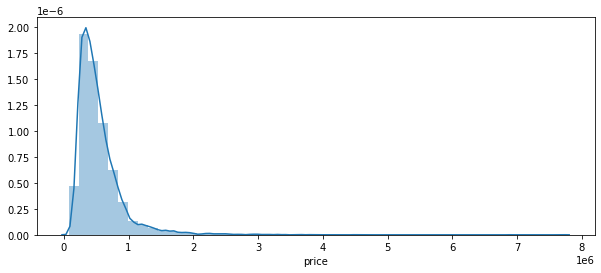

In [ ]:
# distribution plot for the price
plt.figure(figsize = (10, 4))
sns.distplot(df_clean["price"])

We observe that as the price grows from zero the number of houses in that price range increase to about 0.5 then the number of houses start to drop as the price increases.

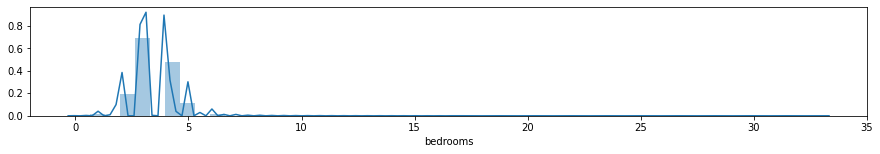

In [ ]:
# distribution plot for the number of bedrooms in a house
plt.figure(figsize = (15, 2))
sns.distplot(df_clean["bedrooms"])

We observe that majority of all the houses lie within the range of 2 to 5 bedrooms while there are a few that have more than 5 bedroooms and a few with just 1 bedroom.

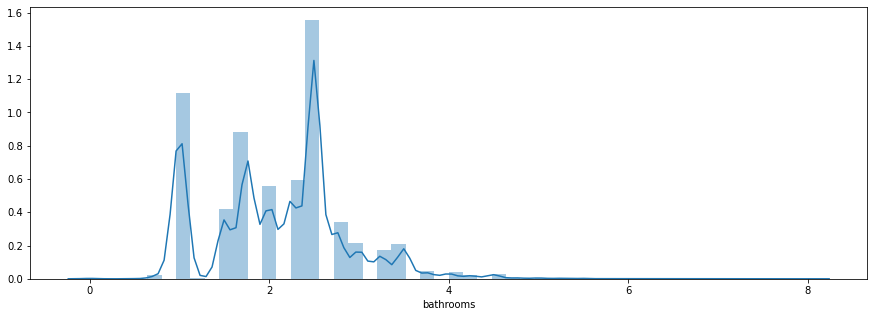

In [ ]:
# distribution plot for the number of bathrooms
plt.figure(figsize = (15, 5))
sns.distplot(df_clean["bathrooms"])

Most houses have 3 bathrooms and below and we can see that those that have more than 3 bathrooms are fewer as the bathrooms reach 4 the number of houses reduce even futher. We do also notice that there are some houses with just one bathroom.

In [ ]:
df.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'year_built', 'year_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

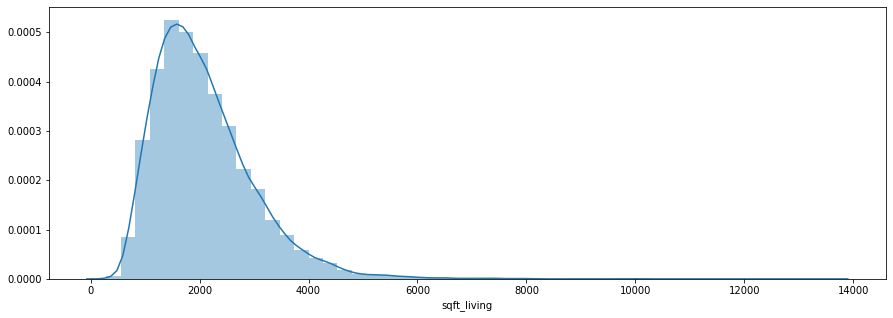

In [ ]:
# distribution plot for the square feet living
plt.figure(figsize = (15, 5))
sns.distplot(df_clean["sqft_living"])

We observe the most common square feet for the living is 2000. At 6000 square feet for the living we have very few houses that fit that characteristic.

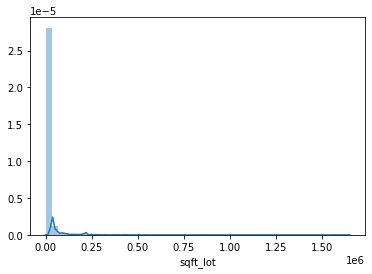

In [ ]:
# distribution of the square feet lot
sns.distplot(df_clean["sqft_lot"])

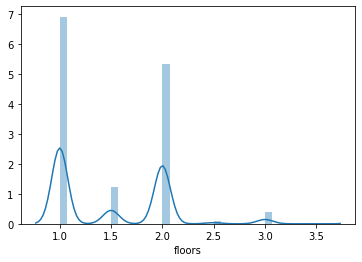

In [ ]:
# distribution for the number of floors
sns.distplot(df_clean["floors"])

We observe that majority of the houses have 1 floor with some at 2 and smaller amount at 1.5. Finally at 3 floors there are even fewer houses.

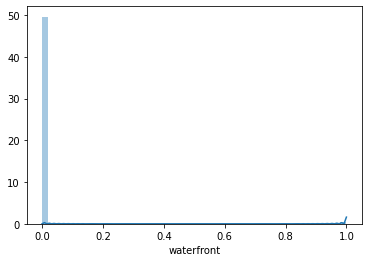

In [ ]:
# distribution for a water front feature
sns.distplot(df_clean["waterfront"])

Majority of the houses have no water front.

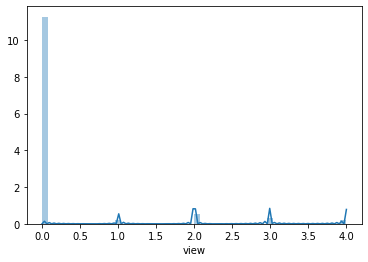

In [ ]:
# distribution of number of views
sns.distplot(df_clean["view"])

We observe that most house have no views but there are some with 1, 2, 3, and/ or 4 views.

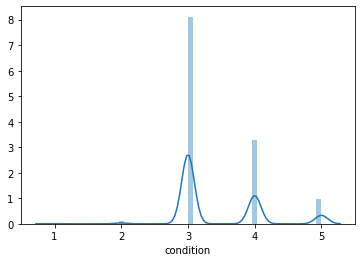

In [ ]:
# distribution of the condition
sns.distplot(df_clean["condition"])

Most houses are at condition  3 and reduce as we headed to condition 4 and 5.

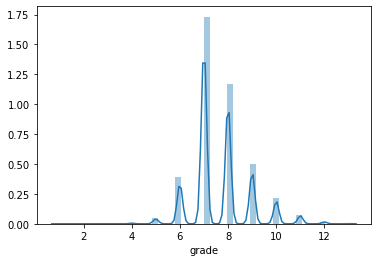

In [ ]:
# distribution for the grade
sns.distplot(df_clean["grade"])

About grade 7 is where most houses lie  followed by 8, 9 , 6, 10 , 11, 12.

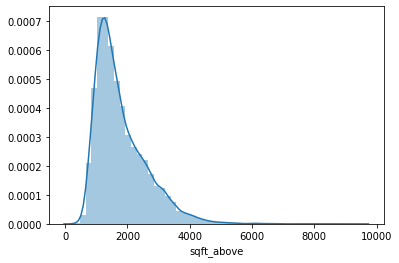

In [ ]:
# distribution for square feet above
sns.distplot(df_clean["sqft_above"])

Most houses have a square feet-above below 2000 square feet. As this increases the number of houses drops considerably.

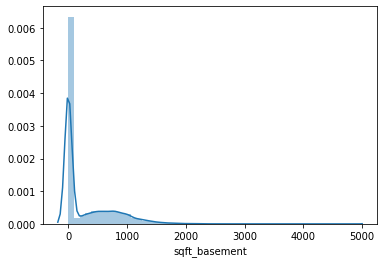

In [ ]:
# distribution of the square feet basement.
sns.distplot(df_clean["sqft_basement"])

Most houses do not have a basement those that do the basement is no bigger than 2000 square feet.

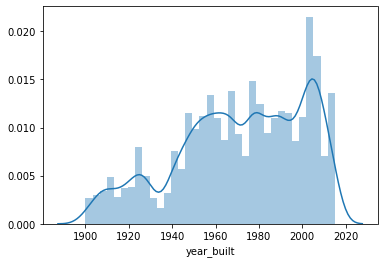

In [ ]:
# distribution for the year built
sns.distplot(df_clean["year_built"])

The houses in our data were built between 1900's to around 2015.

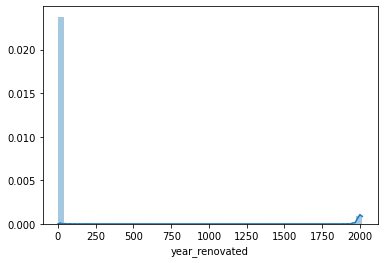

In [ ]:
# distribution for the year renovated
sns.distplot(df_clean["year_renovated"])

Most houses have not been renovated those that have been its within the years 2000's

### Bivariate Analysis

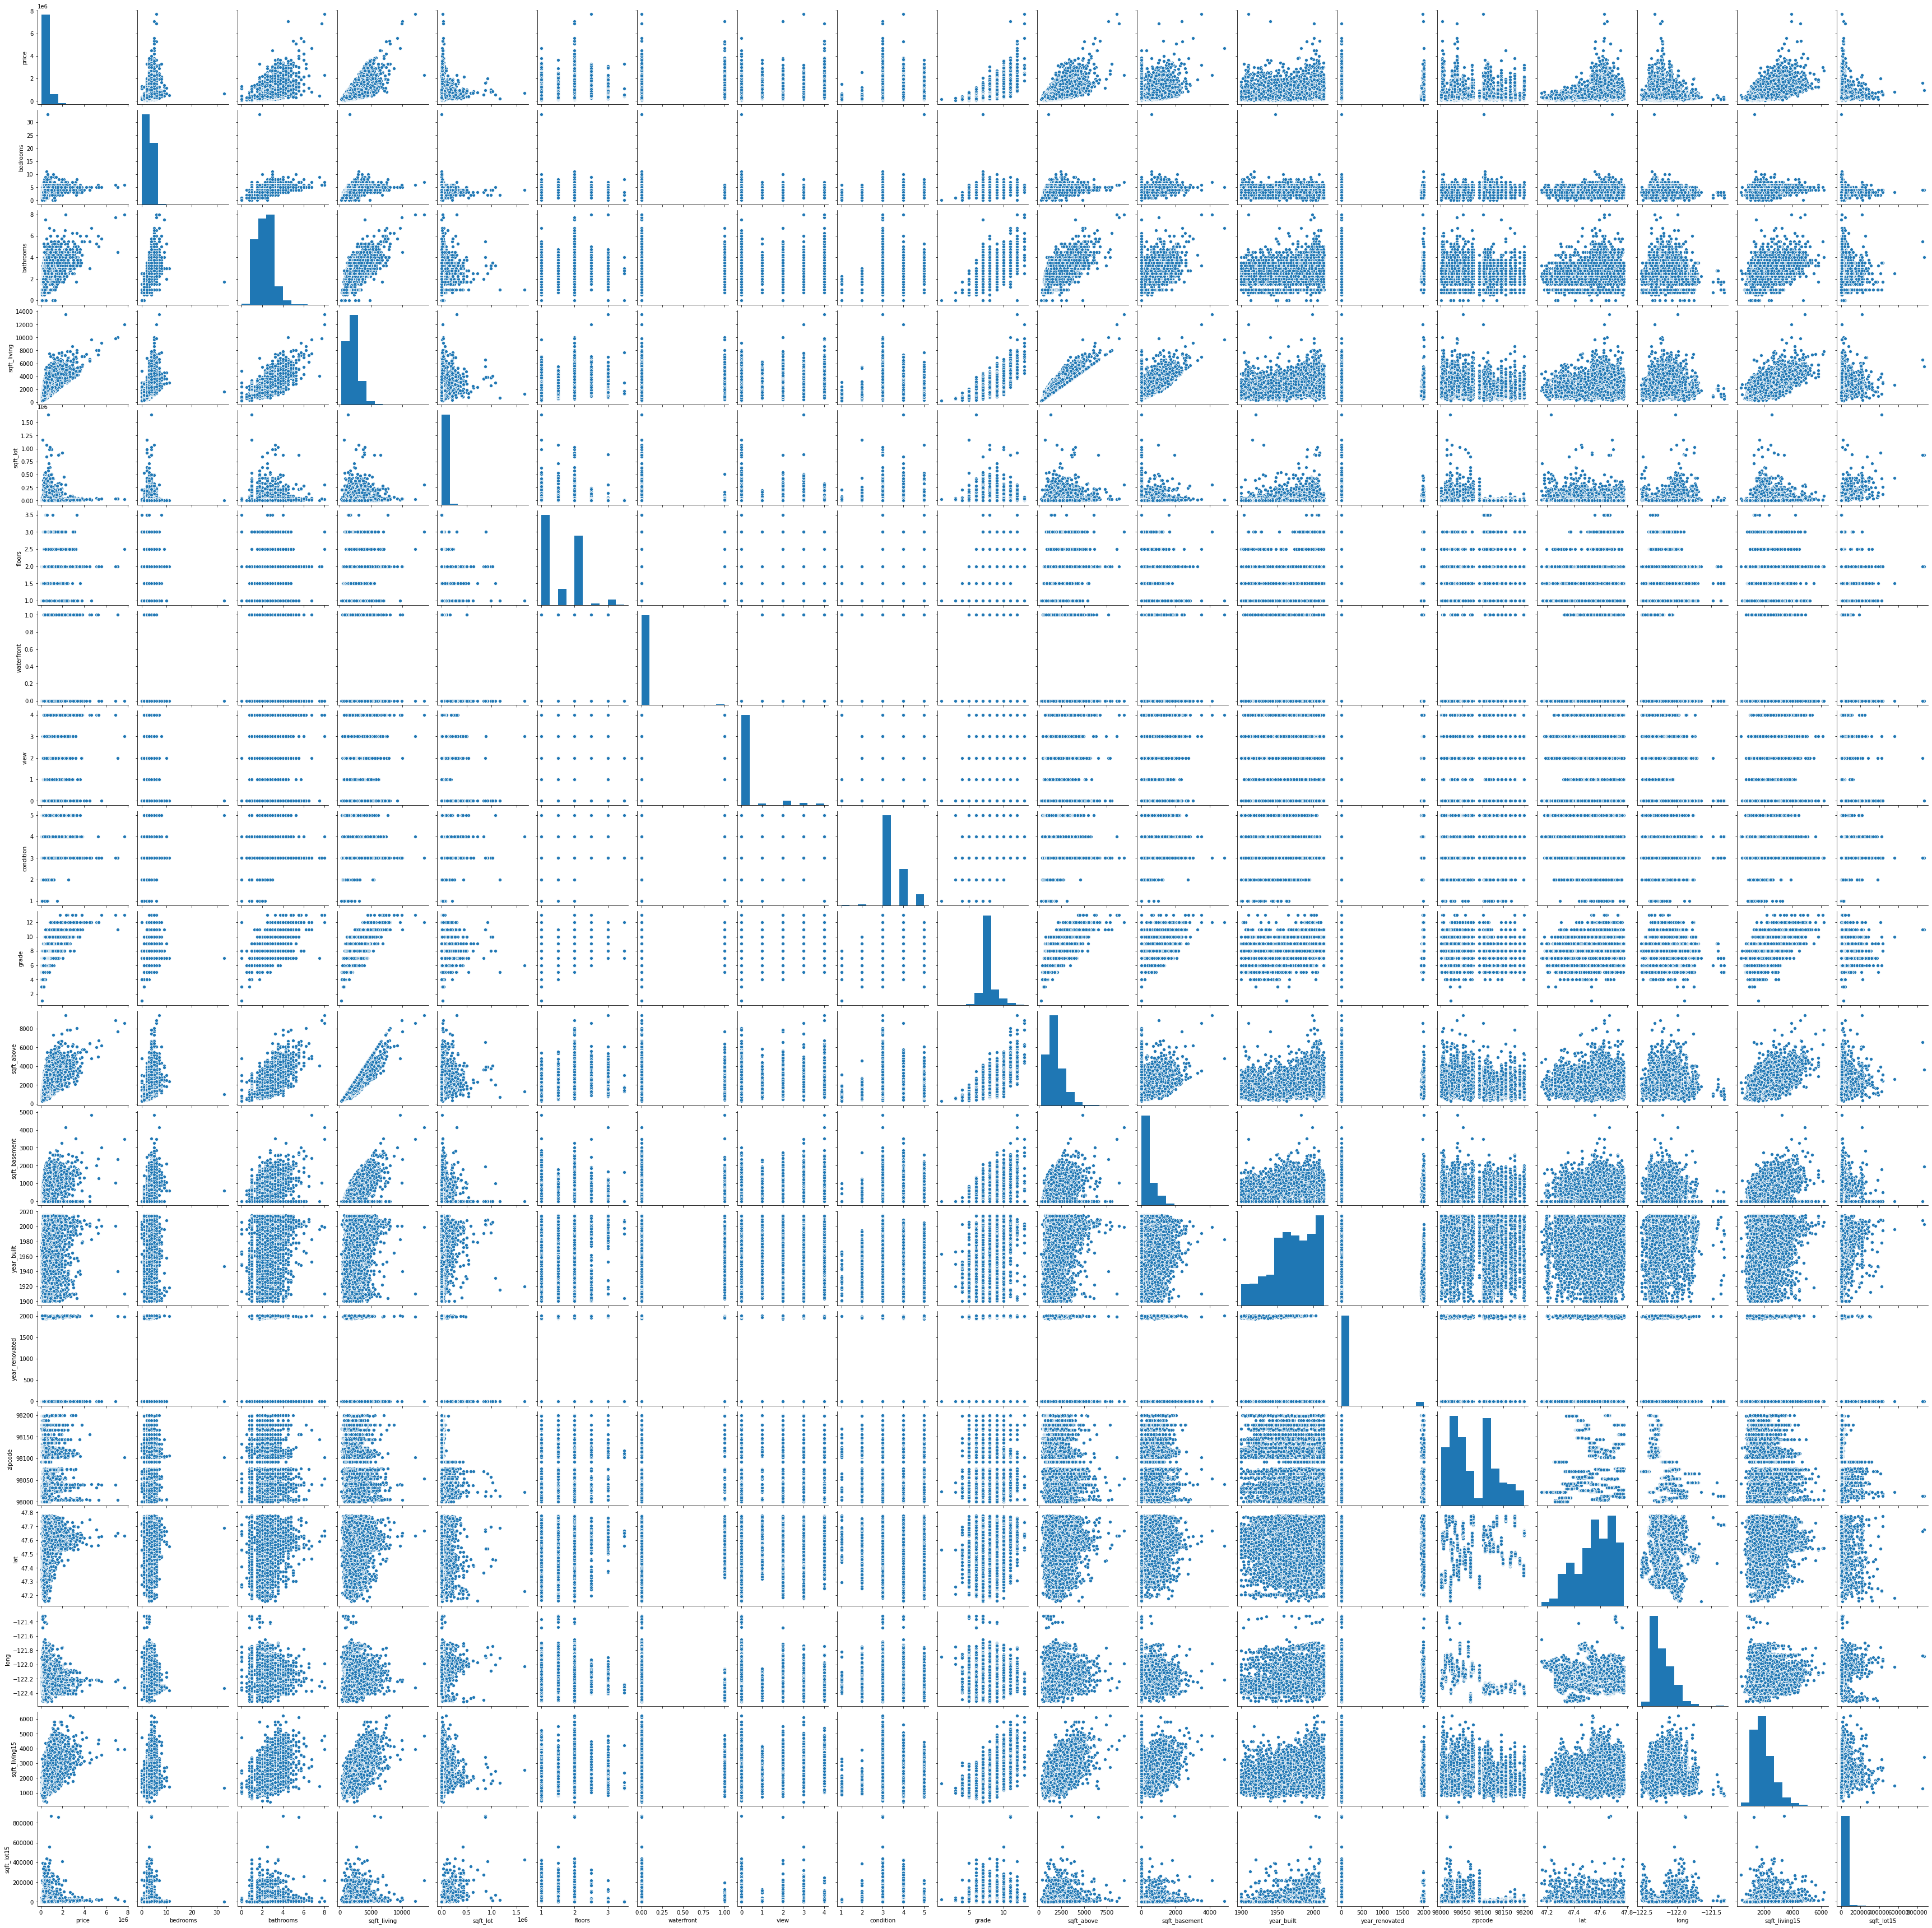

In [ ]:
sns.pairplot(df_clean.drop(columns = ['id']))
plt.show()

In [ ]:
# get the correlation of our variables
corr = df_clean.corr()


In [ ]:
# Find the VIF matrix
print("Below is our VIF matrix\n")
pd.DataFrame(np.linalg.inv(df_clean.corr().values), index = corr.index, columns=corr.columns)

Below is our VIF matrix



id     price  ...  sqft_living15  sqft_lot15
id              1.028540  0.033969  ...       0.009146    0.105496
price           0.033969  3.332295  ...      -0.134514    0.098148
bedrooms        0.002152  0.301726  ...       0.013095    0.094209
bathrooms      -0.005156 -0.287101  ...       0.103587    0.062761
sqft_living    -0.010671 -0.785636  ...      -1.028101   -0.073623
sqft_lot        0.077239 -0.045576  ...       0.166567   -1.452753
floors         -0.011689 -0.033555  ...       0.273871    0.070515
waterfront      0.002847 -0.456966  ...       0.072920   -0.031177
view           -0.038108 -0.369703  ...      -0.310816   -0.021847
condition       0.021970 -0.155362  ...       0.082421   -0.030425
grade          -0.048362 -1.024667  ...      -0.870625    0.037830
sqft_above      0.028104 -0.652563  ...      -0.553437   -0.146129
sqft_basement  -0.001420 -0.224354  ...       0.048639   -0.041890
year_built      0.023671  0.699144  ...       0.049642   -0.011472
year_renovated  0.017587 -0.072360  ...       0.102374   -0.022464
zipcode         0.000245  0.282693  ...       0.198801   -0.007429
lat             0.007392 -0.757299  ...      -0.064068    0.015887
long           -0.072991  0.271815  ...      -0.366240   -0.160569
sqft_living15   0.009146 -0.134514  ...       2.985185   -0.128486
sqft_lot15      0.105496  0.098148  ...      -0.128486    2.149169

[20 rows x 20 columns]

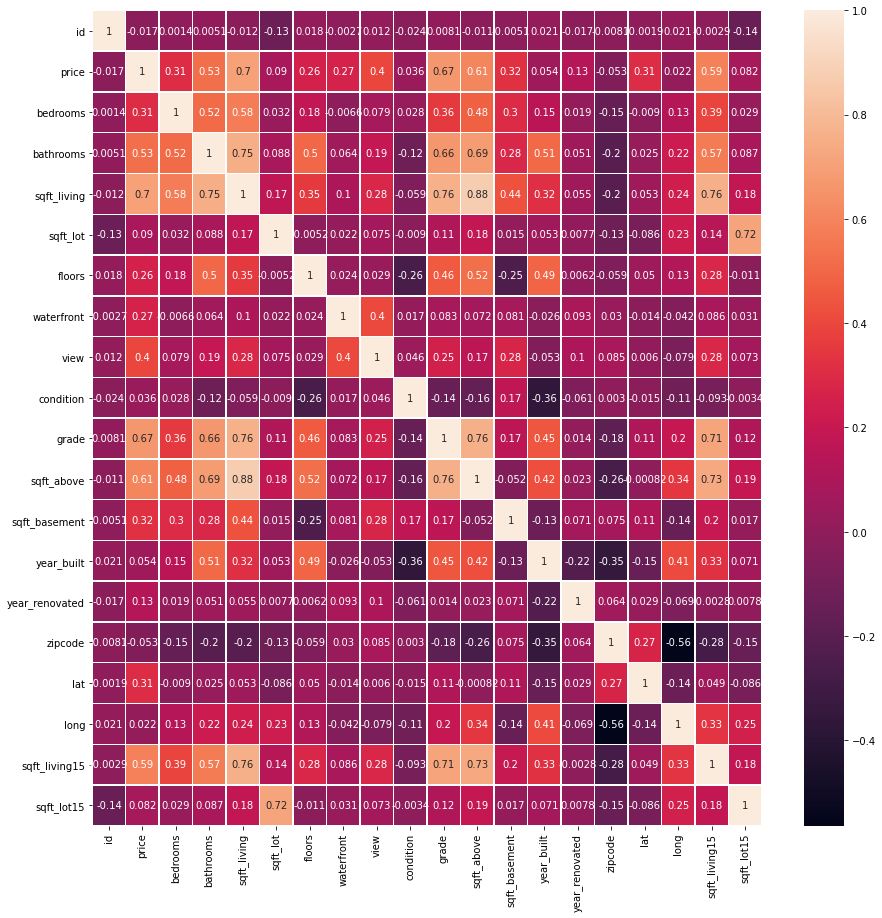

In [ ]:
# plot a heatmap of our Correlation
fig, ax = plt.subplots(figsize=(15, 15)) 
sns.heatmap(corr, annot=True,  linewidths=.5, ax=ax)

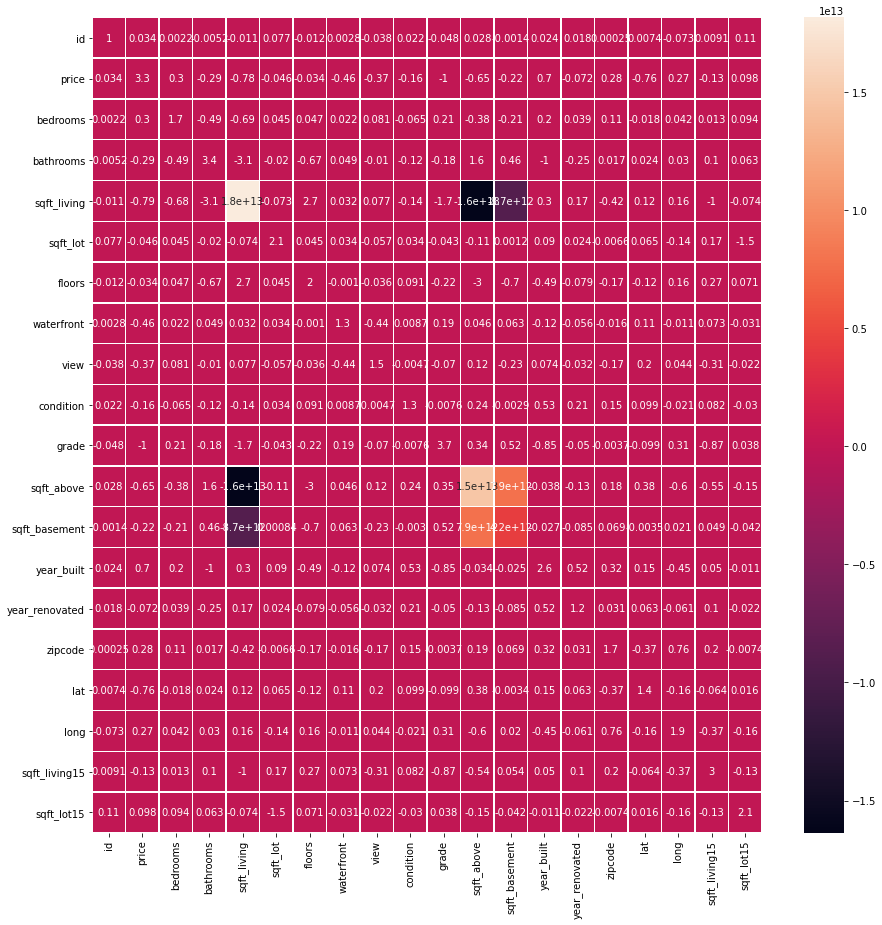

In [ ]:
# plot a heat map for our VIF scores
vif = pd.DataFrame(np.linalg.inv(df_clean.corr().values), index = corr.index, columns=corr.columns)
fig, ax = plt.subplots(figsize=(15, 15)) 
sns.heatmap(vif, annot=True,  linewidths=.5, ax=ax)

From the heat map we can observe that sqft living has a very high VIF score we drop this to see how the rest of the variables will react.

In [ ]:
# make a copy
df_new = df_clean.copy()

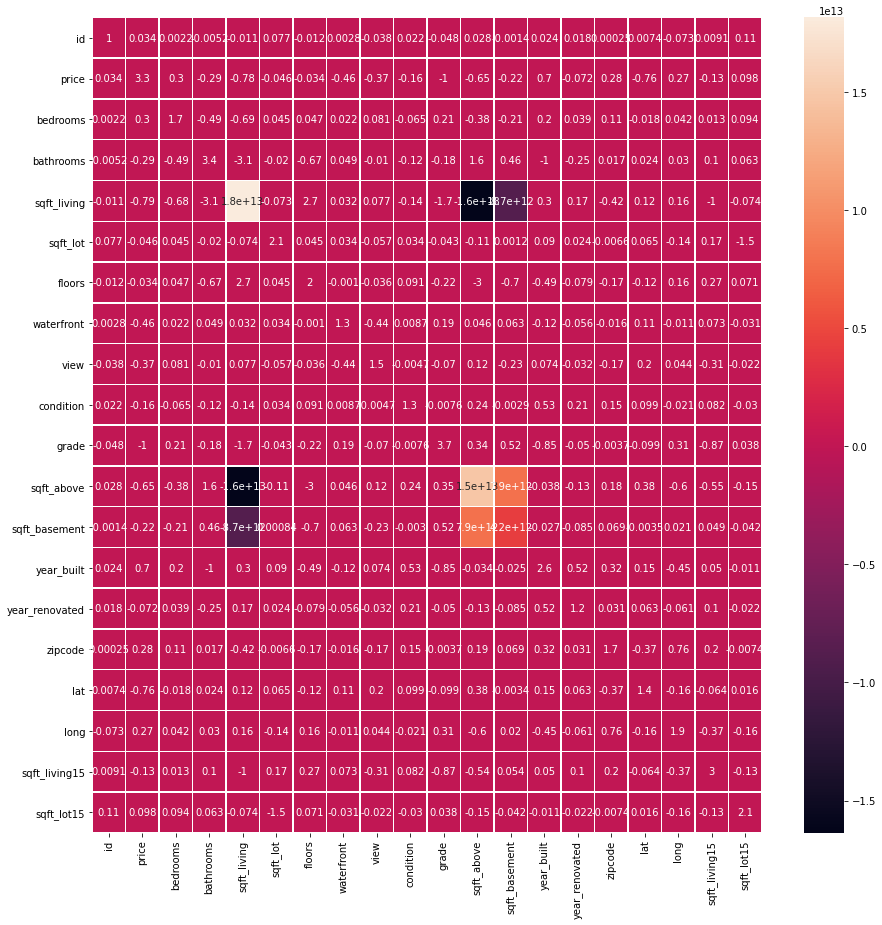

In [ ]:
# dtop the sqft living column and plot a heat map
#df_clea = df_clean.drop(columns = ['sqft_living'])
corr = df_new.corr()
vif = pd.DataFrame(np.linalg.inv(df_new.corr().values), index = corr.index, columns=corr.columns)
fig, ax = plt.subplots(figsize=(15, 15)) 
sns.heatmap(vif, annot=True,  linewidths=.5, ax=ax)

We observe that the VIF scores have considerably dropped and that sqft_above is still high at 5.5 so we drop this as well.

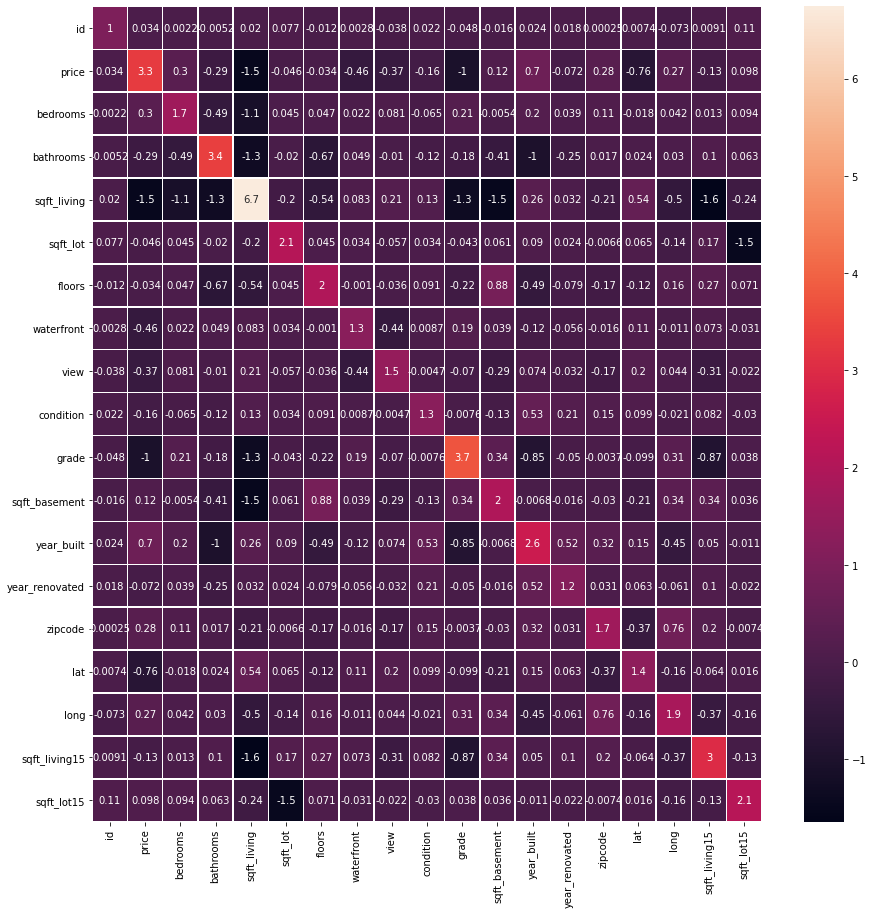

In [ ]:
# plot a heat map with sqft above dropped for our VIF scores
df_new = df_new.drop(columns= "sqft_above")
corr = df_new.corr()
vif = pd.DataFrame(np.linalg.inv(df_new.corr().values), index = corr.index, columns=corr.columns)
fig, ax = plt.subplots(figsize=(15, 15)) 
sns.heatmap(vif, annot=True,  linewidths=.5, ax=ax)

Our VIF scores are now acceptable as a VIF score greater than or equal to 5 is troublesome.

### Multivariate Analysis

We already know that we have outliers in our data so we cannot use Factor analysis. We are left with PCA and LDA. We can use LDA here and challenge our solution later on with PCA.

In [ ]:
# get data for the independent and dependent variables
X = df_new.drop(columns = ['id'])
y = df_new['price']

# function that takes in the independent and dependent variables together with the number of parametes we want to return.
def Factor(X, y, n, d):
 # divide data into training and test sets
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

 # standardize our data before perfoming LDA
  sc = StandardScaler()
  X_train = sc.fit_transform(X_train)
  X_test = sc.transform(X_test)

 # perform LDA 
 # here we will use one parameter 
  lda = LDA(n_components=n)
  X_train = lda.fit_transform(X_train, y_train)
  X_test = lda.transform(X_test)

 # we have now got one parameter to use now we test the perfomance
  classifier = RandomForestClassifier(max_depth=d, random_state=0)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)

  #cm = confusion_matrix(y_test, y_pred)
  #print(cm)
  a = accuracy_score(y_test, y_pred)
  print('Accuracy: ' + str(a))
  def coe():
    # Create an LDA object
    lda = LDA(n_components = n)
    x = lda.fit(X, y)
    model = x.transform(X)
    coeff = pd.DataFrame(index = X.columns.values, data=x.coef_[0].T)
    print(coeff.sort_values(0, ascending=True))
  coe()

In [ ]:
# we have 18 independent variables
# we start with n as 1
Factor(X, y, 1, 2)

Accuracy: 0.05599259602036094
                        0
lat            -43.949617
waterfront     -12.118487
grade          -11.096975
bathrooms       -6.326595
bedrooms        -2.595159
condition       -2.549767
view            -0.795431
sqft_living15   -0.001014
year_renovated  -0.000531
sqft_lot        -0.000019
price            0.000000
sqft_lot15       0.000022
sqft_basement    0.001471
sqft_living      0.002647
zipcode          0.013062
year_built       0.143874
floors           1.362126
long            19.713554


Our accuracy with one parameter is 0.055.

In [ ]:
# we start with n as 5
Factor(X, y, 5, 2)

Accuracy: 0.05599259602036094
                        0
lat            -43.949617
waterfront     -12.118487
grade          -11.096975
bathrooms       -6.326595
bedrooms        -2.595159
condition       -2.549767
view            -0.795431
sqft_living15   -0.001014
year_renovated  -0.000531
sqft_lot        -0.000019
price            0.000000
sqft_lot15       0.000022
sqft_basement    0.001471
sqft_living      0.002647
zipcode          0.013062
year_built       0.143874
floors           1.362126
long            19.713554


In [ ]:
# we start with n as 1
Factor(X, y, 15, 2)

Accuracy: 0.05599259602036094
                        0
lat            -43.949617
waterfront     -12.118487
grade          -11.096975
bathrooms       -6.326595
bedrooms        -2.595159
condition       -2.549767
view            -0.795431
sqft_living15   -0.001014
year_renovated  -0.000531
sqft_lot        -0.000019
price            0.000000
sqft_lot15       0.000022
sqft_basement    0.001471
sqft_living      0.002647
zipcode          0.013062
year_built       0.143874
floors           1.362126
long            19.713554


We observe that no matter how many parameters we include the accuracy score does not change. The question is what would happen if we changed the depth. The coefficients always remain the same.

What is the maximum depth? This is how we far push each node until all the leaves are pure. If we do not set this the nodes are expanded until all the leaves are pure or until all leaves contain less than min_samples_split samples.

In [ ]:
# we start the maximum depth at 5 and one parameter
Factor(X, y, 1, 5)

We notice the accuracy has considerably improved despite the factor we only have one parameter.

In [ ]:
# maximum depth at 10 and parameters are 5
Factor(X, y, 5, 10)

The accuracy has improved yet again by adding the number of parameters and depth.

In [ ]:
# maximum depth at 15 and parameters at 10
Factor(X, y, 10, 15)

The accuracy has improved yet again. The question now is how far can we push LDA to a point where the accuracy does not improve any more?

## 5. Solution Implementation.

We have indentified the columns that we will use in our prediction. This are the ones we will use in this section.

In [ ]:
# make a copy
df_reg = df_new.copy()
df_reg.columns

# drop the id column
df_reg.drop(columns = ['id'], inplace = True)

# set our dependent and independent variables.
X = df_reg.iloc[:, 1:16]
y = df_reg.iloc[:,0]

# this are the variables we will use throughout our regressions in this section

In [ ]:
X.columns


### Linear Regression

This is going to be our baseline model we will compare all other results to this model and see how they perform based on this model.

#### setting our train, test sets

In [77]:
# set our training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# fit the linear regression to the train set
reg = LinearRegression()
reg.fit(X_train, y_train)


# check what coefficients the regression model has chosen
coef = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
coef.sort_values("Coefficient", ascending = True)

Coefficient
long           -209598.733612
bedrooms        -36123.546488
year_built       -2585.323974
zipcode           -597.909330
sqft_basement      -32.345360
sqft_lot            -0.040816
year_renovated      18.264426
sqft_living        189.589224
floors            3927.538957
condition        26353.974493
bathrooms        38712.471116
view             55301.106837
grade            99992.424311
lat             606085.825445
waterfront      636377.613270

#### Making the prediction 

In [78]:
# do predictions
y_pred = reg.predict(X_test)

# compare the actual output values for X_test with the predicted values
predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predicted

Actual      Predicted
9790    680200.0  667761.395138
10280   550000.0  502363.750705
21572   230000.0  266947.925427
20060   379950.0  448855.993109
21204  1060000.0  808375.706218
...          ...            ...
17762   300000.0  207550.786358
13211   395000.0  620402.140036
8108    395000.0  555403.142171
19728   489000.0  503398.322881
16123   382500.0  316872.608335

[4322 rows x 2 columns]

#### Error results

In [79]:
# evaluate the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean of y: ',y.mean())

Mean Absolute Error: 125141.40403291554
Mean Squared Error: 38262685179.03196
Root Mean Squared Error: 195608.49976172292
Mean of y:  540178.9448403517


We can see that the RMSE is huge greater than 10% of the y mean. Therefore the linear model is no good in the prediction of prices.

### Quantile Regression

As noted in the univariate analysis the variance is huge. Linear models have a key assumption that the error has a constant variance across the independent variables which we know is now proved wrong. The linear model also proved to be no good in the prediction of house prices so lets see how quantile favors.

#### Quantile regression at 0.5 quantile

In [80]:
# begin quantile regression
mod = smf.quantreg('y ~ X', df_reg)
res = mod.fit(q=.5)

# print out the summary of our model
print(res.summary())


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4716
Model:                       QuantReg   Bandwidth:                   1.961e+04
Method:                 Least Squares   Sparsity:                    2.666e+05
Date:                Sun, 02 Aug 2020   No. Observations:                21610
Time:                        08:53:19   Df Residuals:                    21594
                                        Df Model:                           15
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    148.9001      3.049     48.840      0.000     142.924     154.876
X[0]       -2.131e+04   1249.562    -17.053      0.000   -2.38e+04   -1.89e+04
X[1]        2.995e+04   2152.776     13.913      0.000    2.57e+04    3.42e+04
X[2]         119.5145      2.196     54.431      0.0

We are able to observe the various coefficients of different variables.

#### Linear Regression model for variance and mean

In [81]:
# create a linear regression model to check variance and mean.

columns = df_reg.iloc[:, 1:16]

for i, colval in enumerate(columns):
  X = np.array(df_reg[colval].values.reshape(-1,1))
  y = np.array(df_reg['price'])

  lr = LinearRegression(fit_intercept=True, normalize=False)
  lr.fit(X,y)

  y_pred = lr.predict(X)
  print(f"           | {colval} |\n")
  print("Mean squared error: {0:.2f}"
        .format(np.mean((y_pred - y) ** 2)))
  print('Variance score: {0:.2f}'.format(lr.score(X, y)))
  print("\n==============================\n")


           | bedrooms |

Mean squared error: 122135047322.99
Variance score: 0.10


           | bathrooms |

Mean squared error: 97747173555.18
Variance score: 0.28


           | sqft_living |

Mean squared error: 68446228009.70
Variance score: 0.49


           | sqft_lot |

Mean squared error: 133882456200.24
Variance score: 0.01


           | floors |

Mean squared error: 126067267839.29
Variance score: 0.07


           | waterfront |

Mean squared error: 125393820156.43
Variance score: 0.07


           | view |

Mean squared error: 113645350269.15
Variance score: 0.16


           | condition |

Mean squared error: 134788595827.03
Variance score: 0.00


           | grade |

Mean squared error: 74835710438.77
Variance score: 0.45


           | sqft_basement |

Mean squared error: 120812266442.15
Variance score: 0.10


           | year_built |

Mean squared error: 134574113849.99
Variance score: 0.00


           | year_renovated |

Mean squared error: 132807491068.86
Varianc

We can observe that the variance is either zero or close to zero. This means that our linear model was not good at predicting.

#### coefficients for the 0.5 quantile

In [83]:
# find the regression coefficients for the conditioned median, 0.5 quantile

for i, colval in enumerate(columns):
  X = np.array(df_reg[colval].values.reshape(-1,1))
  y = np.array(df_reg['price'])

  mod = smf.quantreg('y ~ X', df_reg)
  res = mod.fit(q=.5)

# print out the summary of our model

  print(f"           | {colval} |\n")
  print(res.summary())
  print("*****************************************************************")
  print(res.params)
  print("\n***************************************************************\n")

           | bedrooms |

                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:              0.04633
Model:                       QuantReg   Bandwidth:                   4.016e+04
Method:                 Least Squares   Sparsity:                    5.565e+05
Date:                Sun, 02 Aug 2020   No. Observations:                21610
Time:                        09:01:30   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.8e+05   7116.396     25.294      0.000    1.66e+05    1.94e+05
X             8.5e+04   2035.111     41.767      0.000     8.1e+04     8.9e+04
*****************************************************************
Intercept    179999.999994
X            

#### Quantile regression for different quantiles (0.1 to 0.9)

In [85]:
# similarly we can do the models for other quantiles
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# we build models for each quantile
for i, colval in enumerate(columns):
    X = np.array(df_reg[colval].values.reshape(-1,1))
    y = np.array(df_reg['price'])
    for qt in quantiles: 
       mod = smf.quantreg('y ~ X', df_reg)
       res = mod.fit(q = qt)
       models.append(res)
       params.append([qt, res.params['Intercept'], res.params['X']] + res.conf_int().loc['X'].tolist())

# make a dataframe so we we can view our different models
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'X_coef', 'cf_lower_bound', 'cf_upper_bound'])
params

qt     intercept         X_coef  cf_lower_bound  cf_upper_bound
0    0.1  1.198000e+05   40050.000001    37230.100748    42869.899253
1    0.2  1.350000e+05   50000.000001    47090.337138    52909.662864
2    0.3  1.497500e+05   61049.999999    57639.130857    64460.869140
3    0.4  1.650000e+05   72500.000000    68716.436956    76283.563044
4    0.5  1.800000e+05   85000.000002    81011.031417    88988.968587
..   ...           ...            ...             ...             ...
130  0.5  1.378887e+07  109126.985144    82307.302014   135946.668274
131  0.6  1.609840e+07  127490.054232    94688.921787   160291.186676
132  0.7  1.733531e+07  136986.287448    99871.090187   174101.484708
133  0.8  1.642321e+07  128631.974915    80289.531345   176974.418484
134  0.9 -7.048010e+06  -64935.256466  -136228.654172     6358.141240

[135 rows x 5 columns]

#### Linear model with OLS 

In [87]:
# linear regression using OLS

for i, colval in enumerate(columns):
    X = np.array(df_reg[colval].values.reshape(-1,1))
    y = np.array(df_reg['price'])
    ols = smf.ols('y ~ X', df_reg).fit()
    print(f"           | {colval} |\n")
    print(ols.summary())

    param1 = ols.conf_int().loc['X'].tolist()
    lin = dict(intercept = ols.params['Intercept'],
              X_coef = ols.params['X'],
              cf_lower_bound = param1[0],
              cf_upper_bound = param1[1])
    #print(ols)
    #print("*****************************************************************")

           | bedrooms |

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2270.
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        09:14:23   Log-Likelihood:            -3.0650e+05
No. Observations:               21610   AIC:                         6.130e+05
Df Residuals:                   21608   BIC:                         6.130e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.296e+05   893

#### Plots for the different features 

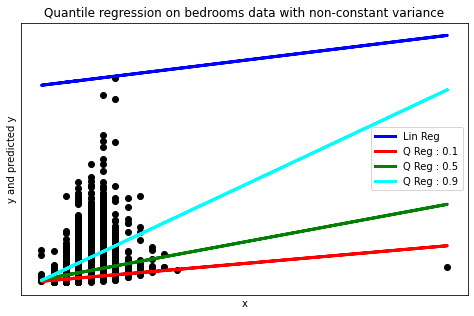

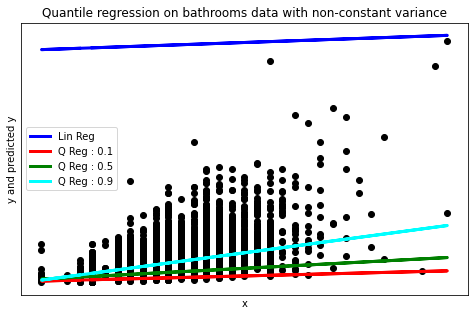

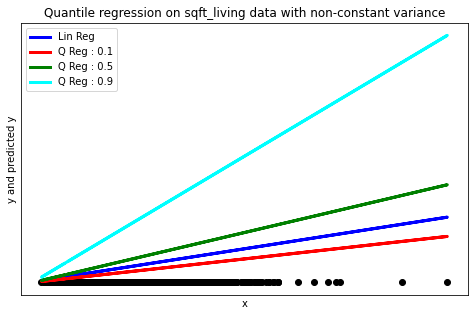

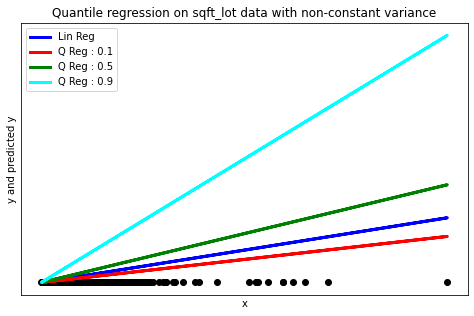

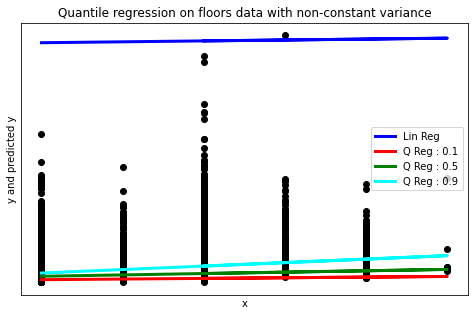

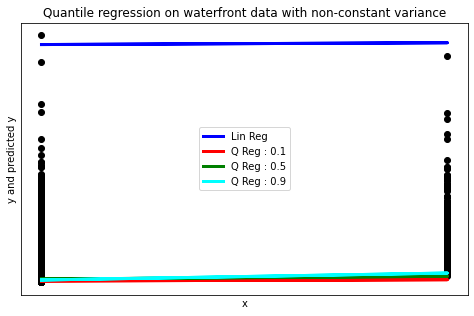

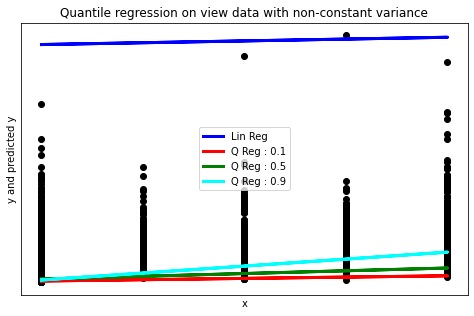

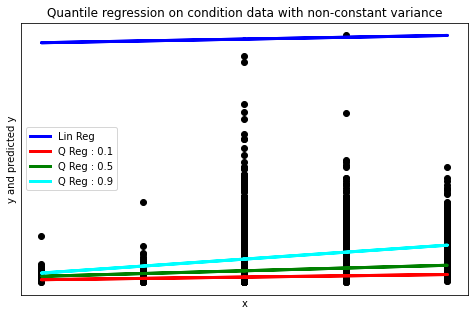

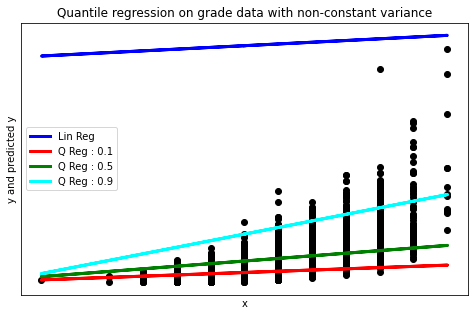

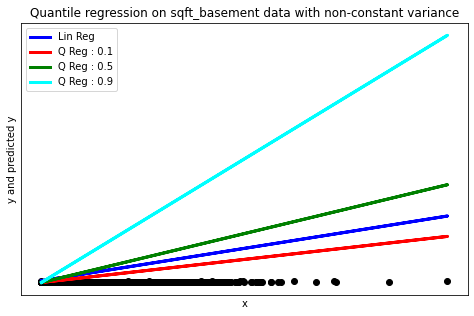

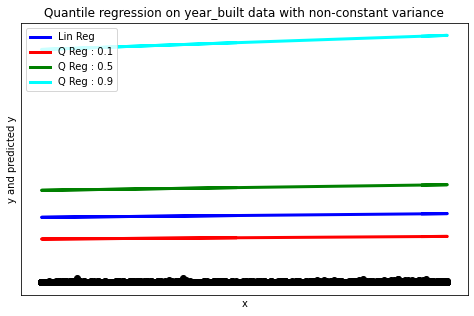

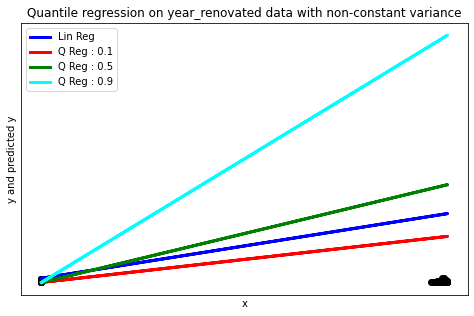

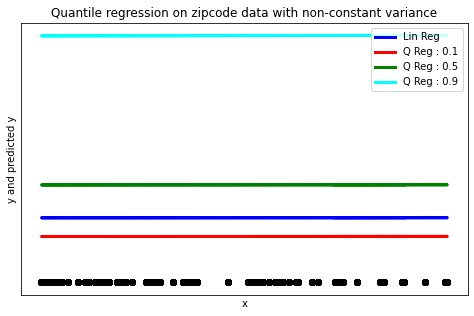

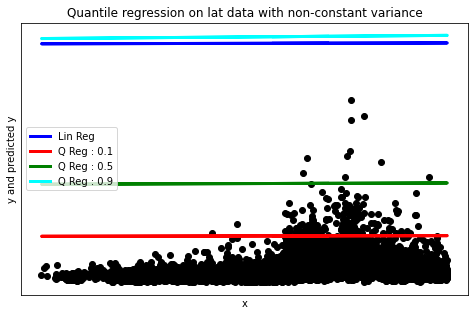

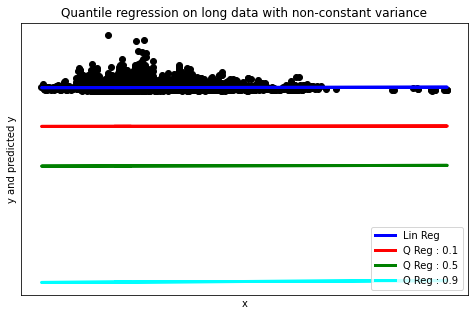

In [88]:
# plot 0.1th, 0.5th and 0.9th quantile models against our original data.

for i, colval in enumerate(columns):
  X = np.array(df_reg[colval].values.reshape(-1,1))
  y = np.array(df_reg['price'])

  figure,ax = plt.subplots(figsize=(8,5))

  plt.scatter(X, y,  color='black')

  y_pred1 = ols.params['Intercept'] + ols.params['X'] * X
  plt.plot(X, y_pred1, color='blue',
         linewidth=3, label='Lin Reg')

  y_pred2 = models[0].params['Intercept'] + models[0].params['X'] * X
  plt.plot(X, y_pred2, color='red',
         linewidth=3, label='Q Reg : 0.1')

  y_pred3 = models[4].params['Intercept'] + models[4].params['X'] * X
  plt.plot(X, y_pred3, color='green',
         linewidth=3, label='Q Reg : 0.5')


  y_pred4 = models[8].params['Intercept'] + models[8].params['X'] * X
  plt.plot(X, y_pred4, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

  plt.xticks(())
  plt.yticks(())
  plt.xlabel("x")
  plt.ylabel("y and predicted y")
  plt.title(f"Quantile regression on {colval} data with non-constant variance")
  plt.legend()

The blue line shows the linear regression as such we can compare it to the quantile regression. In most of the columns we can see the blue line is way out of the data points.

### Ridge Regression

 get variables and get alpha

In [246]:
# set our dependent and independent variables.
X = df_reg.iloc[:, 1:16]
y = df_reg.iloc[:,0]

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

regs = LinearRegression()
regs.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regs.predict(X)))
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
# find the alpha
search.fit(X,y)
search.best_params_

{'alpha': 0.01}

#### Functions for ridge regression

In [250]:
# function to get the alpha

# importing our libraries
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error


# function
def alph(X, y):
  # perform fit with no regularization
  regs = LinearRegression()
  regs.fit(X,y)
  # y_pred = reg.predict(X_test)
  first_model = (mean_squared_error(y_true=y,y_pred=regs.predict(X)))
  print("Running linear regression with no regularization results in an MSE of: ", first_model)
  print("Running linear regression with no regularization results in ab RMSE of: ", np.sqrt(first_model))

  # determine the most appropriate value for l2 regularization
  ridge = Ridge(normalize=True)
  search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

  # find the alpha
  search.fit(X,y)
  print("The most appropriate alpha based on the data is:", search.best_params_)

In [251]:
# function call to calculate linear regression with no regularization
alph(X, y)

Running linear regression with no regularization results in an MSE of:  40635872096.360344
Running linear regression with no regularization results in ab RMSE of:  201583.41225497783
The most appropriate alpha based on the data is: {'alpha': 0.01}


In [213]:
# function with regularization

def regular(X,y, a):
  #search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
  {'alpha': a}
  print("The best score is:", abs(search.best_score_))

  # We can confirm this by fitting our model with the ridge information and finding the mean squared error below
  ridge = Ridge(normalize=True,alpha=0.01)
  ridge.fit(X,y)
  second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
  print("The mean squared error with ridge regression is:", second_model)
  print("The Root mean squared error with ridge regression is:",np.sqrt(second_model))

  # find the coefficients for the different variables
  coef_dict_baseline = {}
  for coef, feat in zip(regs.coef_,df_reg.columns):
      coef_dict_baseline[feat] = coef
  print(coef_dict_baseline)

In [214]:
# function call for regularization
regular(X, y, 0.01)

The best score is: 41028500198.05141
The mean squared error with ridge regression is: 40647519480.85822
The Root mean squared error with ridge regression is: 201612.29992452895
{'price': -35476.046941450826, 'bedrooms': 40940.78644552223, 'bathrooms': 189.23676461716605, 'sqft_living': -0.05312756410421571, 'sqft_lot': 4972.931042530723, 'floors': 578597.6284397967, 'waterfront': 55030.737748139145, 'view': 25693.446403069276, 'condition': 99987.26041241613, 'grade': -34.56634003955969, 'sqft_basement': -2640.173782709518, 'year_built': 18.595627546856065, 'year_renovated': -602.8613101757917, 'zipcode': 607419.1487791643, 'lat': -207939.52504364154}


In ridge regression the RMSE of linear is still lower than that of ridge.

#### Residual Plots

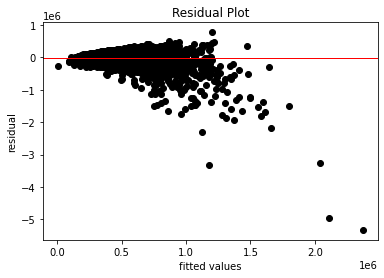

In [217]:
# plotting the residual plot
# residuals have been calculated by by substracting the test value from the predicted value
ridge = Ridge(normalize=True)
ridge.fit(X_train, y_train)

# making predictions
y_pred = ridge.predict(X_test)
residuals = np.subtract(y_pred, y_test)

# plotting the residual scatterplot
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()

We observe that our residual plot has a high density of points close to the origin and a low density of points away from the origin.

#### Heteroskedascity using barlett's test

In [230]:
# performing the barlett's test
import scipy
test_result, p_value = scipy.stats.bartlett(y_pred.flatten(), np.array(list(residuals)))

# calculating the critical value of the chi squared distribution, to compare it with the test_result
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = scipy.stats.chi2.ppf(probability, degrees_of_freedom)

# if the test_result is greater than the critical value, then the null hypothesis is rejected. This means that there are patterns to the variance of the data
# otherwise, if no patterns are identified, null hypothesis is accepted. This means that the variance is homogeneous across the dataset

if (test_result > critical_value):
  print(f'The test result of', np.round(test_result,2), 'is greater than the critical value of', np.round(critical_value, 2))
  print('The variances are unequal, further studies needed the variances can be said to be heterogenous')
else:
  print('The test result of',np.round(test_result,2), 'is less than the critical value of', critical_value)
  print('The variances are equal the variances can be said to be homogeneous')

The test result of 197.48 is less than the critical value of inf
The variances are equal the variances can be said to be homogeneous


### Lasso Regression

#### Function

In [100]:
# function to perform lasso regression

# function
class lass:
  def __init__(self, X, y):
    self.X = X
    self.y = y
  # function to return the linear and lasso errors
  def lass1(self):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
    parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

    linear = linear_model.LinearRegression()
    lasso = linear_model.Lasso() 
    gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

    # Fitting models and print the best parameters, R-squared scores, MSE, and coefficients
    gridlasso.fit(X_train, y_train) 
    linear.fit(X_train, y_train) 
    print("lasso best parameters:", gridlasso.best_params_) 
    print("lasso score:", gridlasso.score(X_test, y_test))
    print("linear score:", linear.score(X_test, y_test)) 
    print("lasso MSE:", mean_squared_error(y_test, gridlasso.predict(X_test)))
    print("lasso RMSE:", np.sqrt(mean_squared_error(y_test, gridlasso.predict(X_test))))
    print("linear MSE:", mean_squared_error(y_test, linear.predict(X_test))) 
    print("linear RMSE:", np.sqrt(mean_squared_error(y_test, linear.predict(X_test))))
    print("lasso best estimator coef:", gridlasso.best_estimator_.coef_)
    print("linear coef:", linear.coef_)

    # function to plot our results
    def viz(X_train, y_train):
      coefsLasso = []
      alphasLasso = np.arange(0,20, 0.1)
      for i in range(200):
        lasso = linear_model.Lasso(alpha = alphasLasso[i])
        lasso.fit(X_train, y_train)
        coefsLasso.append(lasso.coef_)
        
      # Building Lasso coefficient plots
      plt.figure(figsize = (16,7))

      plt.subplot(121)
      plt.plot(alphasLasso, coefsLasso)
      plt.title('Lasso coefficients')
      plt.xlabel('alpha')
      plt.ylabel('coefs')

      plt.show()
    viz(X_train, y_train)

#### Function call

lasso best parameters: {'alpha': 8.0}
lasso score: 0.7034856925011901
linear score: 0.7035076159148503
lasso MSE: 40323576564.480415
lasso RMSE: 200807.3120294189
linear MSE: 40320595155.39854
linear RMSE: 200799.88833512468
lasso best estimator coef: [-3.56991098e+04  3.81247482e+04  1.89909322e+02 -4.74230793e-02
  6.81123268e+03  5.25837914e+05  5.70549886e+04  2.47250146e+04
  9.89665799e+04 -3.03360060e+01 -2.60457009e+03  1.56553549e+01
 -6.05714963e+02  6.12646284e+05 -2.03276439e+05]
linear coef: [-3.57072339e+04  3.81526539e+04  1.89916242e+02 -4.69644361e-02
  6.81342886e+03  5.26949721e+05  5.70165068e+04  2.47520323e+04
  9.89485739e+04 -3.03821550e+01 -2.60357947e+03  1.56440102e+01
 -6.06813283e+02  6.13168786e+05 -2.03957177e+05]


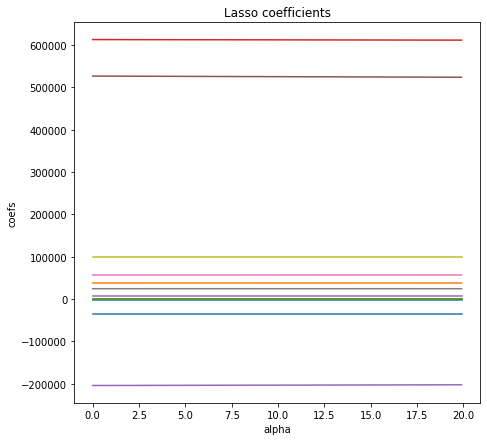

In [101]:
# function call for lasso function 
a = lass(X, y)
a.lass1()

In lasso regression Linear model still out performs Lasso with just a small margin. The RMSE is still big here. 

#### Residual plots


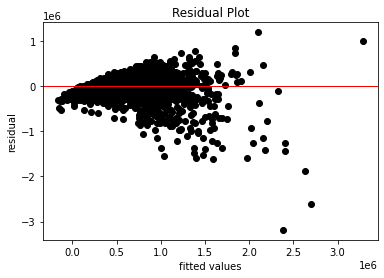

In [231]:
# plotting the residual plot
# residuals have been calculated by by substracting the test value from the predicted value
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=101)
parameters = {'alpha': np.concatenate((np.arange(0.1,2,0.1), np.arange(2, 5, 0.5), np.arange(5, 25, 1)))}

linear = linear_model.LinearRegression()
lasso = linear_model.Lasso() 
gridlasso = GridSearchCV(lasso, parameters, scoring ='r2') 

# fitting models and print the best parameters, R-squared scores, MSE, and coefficients
gridlasso.fit(X_train, y_train) 
y_pred = gridlasso.predict(X_test)
residuals = np.subtract(y_pred, y_test)

# plotting the residual scatterplot
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()

We observe that our residual plot has a high density of points close to the origin and a low density of points away from the origin.

#### Heteroskedascity using barlett's test

In [232]:
# performing the barlett's test
import scipy
test_result, p_value = scipy.stats.bartlett(y_pred.flatten(), np.array(list(residuals)))

# calculating the critical value of the chi squared distribution, to compare it with the test_result
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = scipy.stats.chi2.ppf(probability, degrees_of_freedom)

# if the test_result is greater than the critical value, then the null hypothesis is rejected. This means that there are patterns to the variance of the data
# otherwise, if no patterns are identified, null hypothesis is accepted. This means that the variance is homogeneous across the dataset

if (test_result > critical_value):
  print(f'The test result of', np.round(test_result,2),'is greater than the critical value of', np.round(critical_value, 2))
  print('The variances are unequal, further studies needed the variances can be said to be heterogenous')
else:
  print('The test result of',np.round(test_result,2), 'is less than the critical value of', critical_value)
  print('The variances are equal the variances can be said to be homogeneous')

The test result of 906.8 is less than the critical value of inf
The variances are equal the variances can be said to be homogeneous


### Elastic Net Regression

#### Function

In [122]:
# function for elastic regression This calculates the RMSE for linear model and that for the elastic model
class elastic:
  def __init__(self, X, y):
    self.X = X
    self.y = y

  # function for linear regression
  def line(self):
    regression = LinearRegression()
    regression.fit(X, y)
    firt_model = (mean_squared_error(y_true = y, y_pred = regression.predict(X)))
    print("The MSE of this linear model is:",first_model)
    print("The RMSE of this linear model is: ",np.sqrt(first_model))
    coef_dict_baseline = {}
    for coef, feat in zip(regression.coef_,X.columns):
      coef_dict_baseline[feat] = coef
    print(coef_dict_baseline)

  # function for elastic net regression
  def el(self):
    elastic=ElasticNet(normalize=True)
    search=GridSearchCV(estimator=elastic,param_grid={'alpha':np.logspace(-5,2,8),'l1_ratio':[.2,.4,.6,.8]},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
    search.fit(X,y)
    parameters = search.best_params_
    print(parameters)
    b = abs(search.best_score_)
    print(b)

  # function to perfom elastic net regression by specifying our own alpha    
  def el2(self):
    elastic=ElasticNet(normalize=True,alpha=0.001,l1_ratio=0.75)
    elastic.fit(X,y)
    second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
    print("The MSE of elastic regression with alpha as 0.001:",second_model)
    print("The RMSE of this model:",np.sqrt(second_model))
    coef_dict_baseline = {}
    # loop to print the coefficients
    for coef, feat in zip(elastic.coef_,X.columns):
        coef_dict_baseline[feat] = coef
    print(coef_dict_baseline)

#### Function calls

In [123]:
# run the function call to get the linear model
a = elastic(X, y)
a.line()

The MSE of this linear model is: 40635872096.360344
The RMSE of this linear model is:  201583.41225497783
{'bedrooms': -35476.046941450826, 'bathrooms': 40940.78644552223, 'sqft_living': 189.23676461716605, 'sqft_lot': -0.05312756410421571, 'floors': 4972.931042530723, 'waterfront': 578597.6284397967, 'view': 55030.737748139145, 'condition': 25693.446403069276, 'grade': 99987.26041241613, 'sqft_basement': -34.56634003955969, 'year_built': -2640.173782709518, 'year_renovated': 18.595627546856065, 'zipcode': -602.8613101757917, 'lat': 607419.1487791643, 'long': -207939.52504364154}


In [118]:
# run the function call to get the best alpha and ratio to use
a.el()

{'alpha': 1e-05, 'l1_ratio': 0.8}
41111131484.34465


In [120]:
# function that uses the above alpha and l1 ratio
def el1():
      elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
      elastic.fit(X,y)
      second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
      print("The MSE of elastic regression with the best parameters:",second_model)
      print("The RMSE of this model:",np.sqrt(second_model))
      coef_dict_baseline = {}
      # loop to print the coefficients
      for coef, feat in zip(elastic.coef_,X.columns):
          coef_dict_baseline[feat] = coef
      print(coef_dict_baseline)
el1()  

The MSE of elastic regression with the best parameters: 40811297719.36909
The RMSE of this model: 202018.06285421381
{'bedrooms': -27711.18780495074, 'bathrooms': 44079.72316170864, 'sqft_living': 167.4162161658831, 'sqft_lot': -0.009656412914016308, 'floors': 10742.11963553546, 'waterfront': 563864.5284874559, 'view': 56284.21104435332, 'condition': 26171.499665128726, 'grade': 100392.86010501748, 'sqft_basement': -16.61481446380744, 'year_built': -2436.5402936955493, 'year_renovated': 22.008269228478536, 'zipcode': -531.625334251785, 'lat': 585657.8729069124, 'long': -178677.13323381354}


In [105]:
# function call for the alpha as 0.001 and l1 ratio as 0.75
a.el2()

The MSE of elastic regression with alpha as 0.001: 87232994525.90569
The RMSE of this model: 295352.32270274375
{'bedrooms': 11294.146605028924, 'bathrooms': 26772.35490782199, 'sqft_living': 33.487812100245634, 'sqft_lot': 0.08239285267884967, 'floors': 17654.290571229223, 'waterfront': 147921.129307819, 'view': 23403.391821591147, 'condition': 4990.380101855405, 'grade': 25381.37175819974, 'sqft_basement': 29.89830553943074, 'year_built': -65.39894309260926, 'year_renovated': 14.91660412780924, 'zipcode': -29.233867576584327, 'lat': 119054.06236721133, 'long': -7279.20549101469}


The MSE of this linear model is: 40635872096.360344
The RMSE of this linear model is:  201583.41225497783

The MSE of elastic regression with the best parameters: 40811297719.36909
The RMSE of this model: 202018.06285421381


The MSE of elastic regression with alpha as 0.001: 87232994525.90569
The RMSE of this model: 295352.32270274375

In elastic regression the linear model performs better than all the other elastic models although its RMSE is still greater than 10% of the y mean.

#### Residual plots


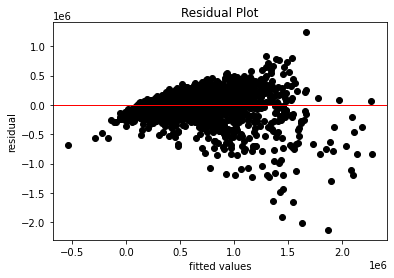

In [237]:
# plotting the residual plot
# residuals have been calculated by by substracting the test value from the predicted value

# set our training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
elastic.fit(X,y)
y_pred = elastic.predict(X_test)


residuals = np.subtract(y_pred, y_test)

# plotting the residual scatterplot
plt.scatter(y_pred, residuals, color='black')
plt.title('Residual Plot')
plt.ylabel('residual')
plt.xlabel('fitted values')
plt.axhline(y = float(residuals.mean()), color='red', linewidth=1)
plt.show()

We observe that our residual plot has a high density of points close to the origin and a low density of points away from the origin.

#### Heteroskedascity using barlett's test

In [240]:
# performing the barlett's test
import scipy
test_result, p_value = scipy.stats.bartlett(y_pred.flatten(), np.array(list(residuals)))

# calculating the critical value of the chi squared distribution, to compare it with the test_result
degrees_of_freedom = len(y_pred) - 1
probability =  1 - p_value
critical_value = scipy.stats.chi2.ppf(probability, degrees_of_freedom)

# if the test_result is greater than the critical value, then the null hypothesis is rejected. This means that there are patterns to the variance of the data
# otherwise, if no patterns are identified, null hypothesis is accepted. This means that  the variance is homogeneous across the dataset

if (test_result > critical_value):
  print('The test result of', np.round(test_result,2), 'is greater than the critical value of', np.round(critical_value, 2))
  print('The variances are unequal, further studies needed the variances can be said to be heterogenous')
else:
  print('The test result of',np.round(test_result,2), 'is less than the critical value of', critical_value)
  print('The variances are equal the variances can be said to be homogeneous')

The test result of 784.35 is less than the critical value of inf
The variances are equal the variances can be said to be homogeneous


**CONCLUSION**

---

We observe that in all the models linear performs the best. We believe that this can be improved with feature selection instead of relying on the models to regularize this.

## 6. Challenging the solution.

We will begin with feature selection.

In [135]:
# make a copy we will use here.
chall = df.copy()
chall.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'year_built', 'year_renovated', 'zipcode', 'lat',
       'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

We have 20 columns so we will pick the best 8 in predicting the price of a house.

#### Feature selection.

In [146]:
# find the best features to predict the price of a house
X = chall.drop('price', axis=1)
Y = chall['price']

# First things first
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=1.0)
ridge.fit(X,Y)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

# helper method for pretty-printing the coefficients
def pretty_print_coefs(coefs, names = None, sort = False):
    if names == None:
        names = ["X%s" % x for x in range(len(coefs))]
    lst = zip(coefs, names)
    if sort:
        lst = sorted(lst,  key = lambda x:-np.abs(x[0]))
    return " + ".join("%s * %s" % (round(coef, 3), name)
                                   for coef, name in lst)

In [149]:
# show the coefficients from the function they will help us choose the features we want.
pretty_print_coefs(ridge.coef_)

'-0.0 * X0 + -35792.887 * X1 + 41099.087 * X2 + 110.474 * X3 + 0.121 * X4 + 6925.521 * X5 + 577994.838 * X6 + 53372.177 * X7 + 26303.426 * X8 + 96161.807 * X9 + 70.683 * X10 + 39.787 * X11 + -2627.222 * X12 + 19.89 * X13 + -580.524 * X14 + 600747.063 * X15 + -211811.864 * X16 + 21.61 * X17 + -0.397 * X18'

1. -0.0 * X0 corresponds to id column no infuluence.
2. -35792.887 * X1 Dependent variable.
3. 41099.087 * X2  number of bedrooms.
4. 110.474 * X3  square feet living 
5. 0.121 * X4 square feet lot
6. 6925.521 * X5 number of floors
7. 577994.838 * X6 waterfront feature
8. 53372.177 * X7 views
9. 26303.426 * X8 condition of the house
10. 96161.807 * X9 grade of the house
11. 70.683 * X10 square feet above
12. 39.787 * X11 square feet basement
13. -2627.222 * X12 year built
14. 19.89 * X13 year renovated
15. -580.524 * X14 zipcode
16. 600747.063 * X15 latitude
17. -211811.864 * X16 longitude
18. 21.61 * X17 square foot living15
19. -0.397 * X18 square foot lot15

How do these coefficients help us? For correlated features, it means that they tend to get similar coefficients. Features having negative coefficients don't contribute that much. But in a more complex scenario where you are dealing with lots of features, then this score will definitely help you in the ultimate feature selection decision-making process.

We take number of bedrooms, square feet living, number of floors, waterfront, views, condition, grade and latitude. We will also pick longitude for good measure.

In [176]:
# get our independent and dependent variables
X = chall[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'lat', 'long']]
Y = chall['price']

### 1. Linear Regression

In [179]:
# set our training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Fit the linear regression to the train set
reg = LinearRegression()
reg.fit(X_train, y_train)


# Check what coefficients the regression model has chosen
coef = pd.DataFrame(reg.coef_, X.columns, columns=['Coefficient'])
coef.sort_values("Coefficient", ascending = True)

Coefficient
long        -222178.240891
bedrooms     -31661.066561
floors       -16032.792638
sqft_living     200.504548
bathrooms      1856.591795
condition     51241.655110
view          59153.052327
grade         87440.996874
lat          632267.561182
waterfront   647056.391634

In [180]:
# do predictions
y_pred = reg.predict(X_test)

# compare the actual output values for X_test with the predicted values
predicted = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
predicted

Actual      Predicted
9790    680200.0  661320.362166
10280   550000.0  434293.003712
21572   230000.0  364603.319862
20060   379950.0  486680.836452
21204  1060000.0  837359.013232
...          ...            ...
17762   300000.0  144670.932003
13211   395000.0  575300.907294
8108    395000.0  597266.011814
19728   489000.0  526281.059795
16123   382500.0  351739.934791

[4322 rows x 2 columns]

In [181]:
# evaluate the algorithm
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean of y: ',Y.mean())

Mean Absolute Error: 131514.38939659286
Mean Squared Error: 42301469229.116066
Root Mean Squared Error: 205673.2097992251
Mean of y:  540178.9448403517


### 2. Quantile Regression

In [161]:
# begin quantile regression
mod = smf.quantreg('Y ~ X', chall)
res = mod.fit(q=.5)

# print out the summary of our model
print(res.summary())

                         QuantReg Regression Results                          
Dep. Variable:                      Y   Pseudo R-squared:             0.002001
Model:                       QuantReg   Bandwidth:                   4.195e+04
Method:                 Least Squares   Sparsity:                    5.665e+05
Date:                Sun, 02 Aug 2020   No. Observations:                21610
Time:                        13:36:52   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.379e+07   1.67e+06      8.246      0.000    1.05e+07    1.71e+07
X           1.091e+05   1.37e+04      7.975      0.000    8.23e+04    1.36e+05

The condition number is large, 1.06e+05. This might indicate that there are
strong multicollinearity or other numerical problems.


In [182]:
# create a linear regression model to check variance and mean.

columns = ['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'lat', 'long']

for i, colval in enumerate(columns):
  X = np.array(chall[colval].values.reshape(-1,1))
  y = np.array(chall['price'])

  line = LinearRegression(fit_intercept=True, normalize=False)
  line.fit(X,Y)

  y_pred = line.predict(X)
  print(f"           | {colval} |\n")
  print("Mean squared error: {0:.2f}"
        .format(np.mean((y_pred - Y) ** 2)))
  print('Variance score: {0:.2f}'.format(line.score(X, Y)))
  print("\n==============================\n")


           | bedrooms |

Mean squared error: 122135047322.99
Variance score: 0.10


           | bathrooms |

Mean squared error: 97747173555.18
Variance score: 0.28


           | sqft_living |

Mean squared error: 68446228009.71
Variance score: 0.49


           | floors |

Mean squared error: 126067267839.29
Variance score: 0.07


           | waterfront |

Mean squared error: 125393820156.43
Variance score: 0.07


           | view |

Mean squared error: 113645350269.15
Variance score: 0.16


           | condition |

Mean squared error: 134788595827.03
Variance score: 0.00


           | grade |

Mean squared error: 74835710438.77
Variance score: 0.45


           | lat |

Mean squared error: 122253333180.25
Variance score: 0.09


           | long |

Mean squared error: 134904612342.38
Variance score: 0.00




In [183]:
# find the regression coefficients for the conditioned median, 0.5 quantile

for i, colval in enumerate(columns):
  X = np.array(chall[colval].values.reshape(-1,1))
  Y = np.array(chall['price'])

  mod = smf.quantreg('Y ~ X', chall)
  res = mod.fit(q=.5)

# print out the summary of our model

  print(f"           | {colval} |\n")
  print(res.summary())
  print("*****************************************************************")
  print(res.params)
  print("\n***************************************************************\n")

           | bedrooms |

                         QuantReg Regression Results                          
Dep. Variable:                      Y   Pseudo R-squared:              0.04633
Model:                       QuantReg   Bandwidth:                   4.016e+04
Method:                 Least Squares   Sparsity:                    5.565e+05
Date:                Sun, 02 Aug 2020   No. Observations:                21610
Time:                        13:56:08   Df Residuals:                    21608
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     1.8e+05   7116.396     25.294      0.000    1.66e+05    1.94e+05
X             8.5e+04   2035.111     41.767      0.000     8.1e+04     8.9e+04
*****************************************************************
Intercept    179999.999994
X            

In [185]:
# similarly we can do the models for other quantiles
quantiles = np.arange(0.1,1,0.1) 
models = []
params = []

# build models for each quantile 
for i, colval in enumerate(columns):
    X = np.array(chall[colval].values.reshape(-1,1))
    Y = np.array(chall['price'])
    for qt in quantiles: 
       mod = smf.quantreg('Y ~ X', chall)
       res = mod.fit(q = qt)
       models.append(res)
       params.append([qt, res.params['Intercept'], res.params['X']] + res.conf_int().loc['X'].tolist())

# make a dataframe so we can view our different models.
params = pd.DataFrame(data = params, columns = ['qt', 'intercept', 'X_coef', 'cf_lower_bound', 'cf_upper_bound'])
params

qt     intercept         X_coef  cf_lower_bound  cf_upper_bound
0   0.1  1.198000e+05   40050.000001    37230.100748    42869.899253
1   0.2  1.350000e+05   50000.000001    47090.337138    52909.662864
2   0.3  1.497500e+05   61049.999999    57639.130857    64460.869140
3   0.4  1.650000e+05   72500.000000    68716.436956    76283.563044
4   0.5  1.800000e+05   85000.000002    81011.031417    88988.968587
..  ...           ...            ...             ...             ...
85  0.5  1.378887e+07  109126.985144    82307.302014   135946.668274
86  0.6  1.609840e+07  127490.054232    94688.921787   160291.186676
87  0.7  1.733531e+07  136986.287448    99871.090187   174101.484708
88  0.8  1.642321e+07  128631.974915    80289.531345   176974.418484
89  0.9 -7.048010e+06  -64935.256466  -136228.654172     6358.141240

[90 rows x 5 columns]

In [186]:
# linear regression using OLS
for i, colval in enumerate(columns):
    X = np.array(chall[colval].values.reshape(-1,1))
    Y = np.array(chall['price'])
    ols = smf.ols('Y ~ X', chall).fit()
    print(f"           | {colval} |\n")
    print(ols.summary())

    param1 = ols.conf_int().loc['X'].tolist()
    lin = dict(intercept = ols.params['Intercept'],
              X_coef = ols.params['X'],
              cf_lower_bound = param1[0],
              cf_upper_bound = param1[1])
    #print(ols)
    #print("*****************************************************************")

           | bedrooms |

                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2270.
Date:                Sun, 02 Aug 2020   Prob (F-statistic):               0.00
Time:                        14:02:40   Log-Likelihood:            -3.0650e+05
No. Observations:               21610   AIC:                         6.130e+05
Df Residuals:                   21608   BIC:                         6.130e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.296e+05   893

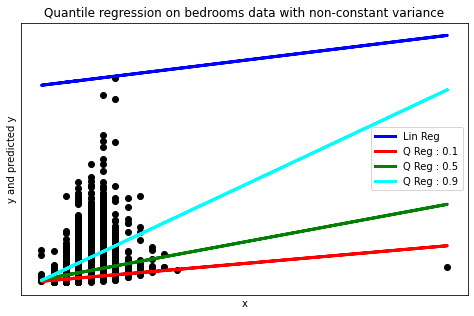

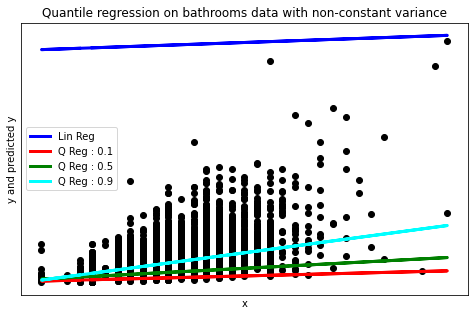

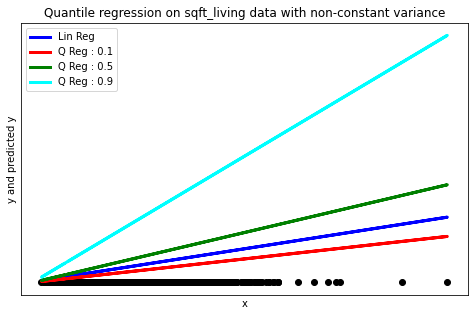

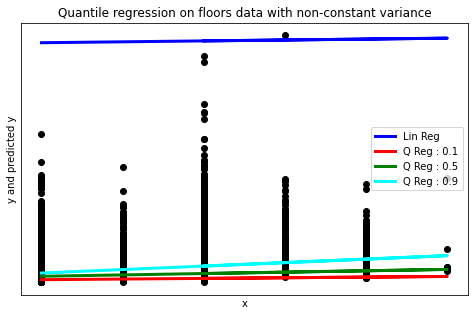

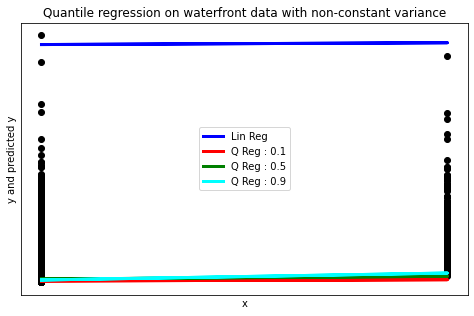

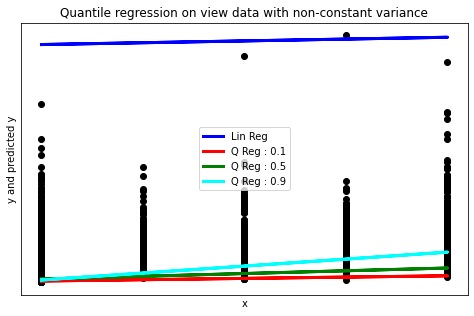

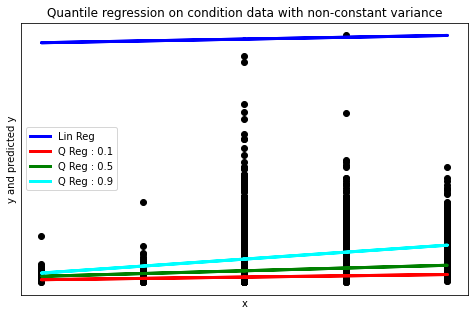

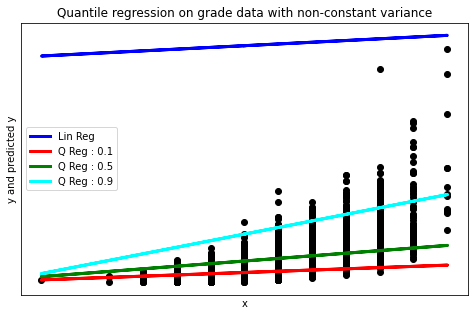

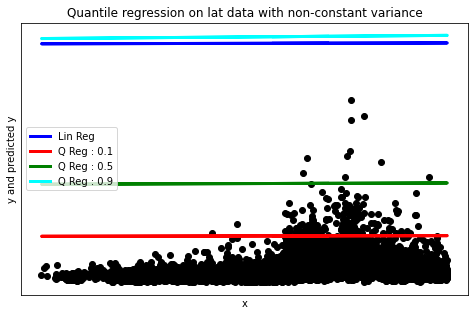

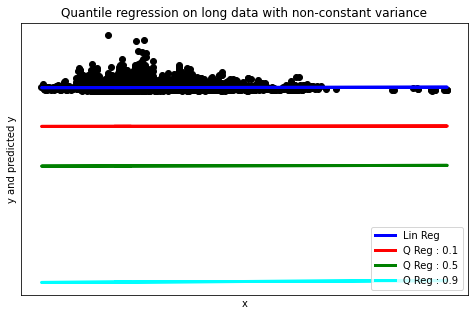

In [187]:
# plot 0.1th, 0.5th and 0.9th quantile models against our original data.

for i, colval in enumerate(columns):
  X = np.array(chall[colval].values.reshape(-1,1))
  Y = np.array(chall['price'])

  figure,ax = plt.subplots(figsize=(8,5))

  plt.scatter(X, Y,  color='black')

  y_pred1 = ols.params['Intercept'] + ols.params['X'] * X
  plt.plot(X, y_pred1, color='blue',
         linewidth=3, label='Lin Reg')

  y_pred2 = models[0].params['Intercept'] + models[0].params['X'] * X
  plt.plot(X, y_pred2, color='red',
         linewidth=3, label='Q Reg : 0.1')

  y_pred3 = models[4].params['Intercept'] + models[4].params['X'] * X
  plt.plot(X, y_pred3, color='green',
         linewidth=3, label='Q Reg : 0.5')


  y_pred4 = models[8].params['Intercept'] + models[8].params['X'] * X
  plt.plot(X, y_pred4, color='cyan',
         linewidth=3, label='Q Reg : 0.9')

  plt.xticks(())
  plt.yticks(())
  plt.xlabel("x")
  plt.ylabel("y and predicted y")
  plt.title(f"Quantile regression on {colval} data with non-constant variance")
  plt.legend()

### 3. Ridge Regression

In [188]:
# get our independent and dependent variables
X = chall[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'lat', 'long']]
y = chall['price']

# splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

regs = LinearRegression()
regs.fit(X,y)
first_model = (mean_squared_error(y_true=y,y_pred=regs.predict(X)))
ridge = Ridge(normalize=True)
search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)

# find the alpha
search.fit(X,y)
search.best_params_

{'alpha': 0.001}

In [189]:
# function call to calculate linear regression with no regularization
alph(X, y)

Running linear regression with no regularization results in an MSE of:  44187812972.14158
Running linear regression with no regularization results in ab RMSE of:  210208.97452806713
The most appropriate alpha based on the data is: {'alpha': 0.001}


In [190]:
# function with regularization

def regular1(X,y, a):
  #search = GridSearchCV(estimator=ridge,param_grid={'alpha':np.logspace(-5,2,8)},scoring='neg_mean_squared_error',n_jobs=1,refit=True,cv=10)
  {'alpha': a}
  print("The best score is:", abs(search.best_score_))

  # We can confirm this by fitting our model with the ridge information and finding the mean squared error below
  ridge = Ridge(normalize=True,alpha=0.01)
  ridge.fit(X,y)
  second_model = (mean_squared_error(y_true=y,y_pred=ridge.predict(X)))
  print("The mean squared error with ridge regression is:", second_model)
  print("The Root mean squared error with ridge regression is:",np.sqrt(second_model))

  # find the coefficients for the different variables
  coef_dict_baseline = {}
  for coef, feat in zip(regs.coef_,chall.columns):
      coef_dict_baseline[feat] = coef
  print(coef_dict_baseline)

In [191]:
# function call for regularization
regular1(X, y, 0.001)

The best score is: 44386173608.3071
The mean squared error with ridge regression is: 44197965441.633026
The Root mean squared error with ridge regression is: 210233.12165696686
{'price': -30462.54788816819, 'bedrooms': 1431.2856534387627, 'bathrooms': 200.8026731056077, 'sqft_living': -14795.027970334151, 'floors': 595650.1438223892, 'waterfront': 58329.979764857875, 'view': 50758.70660754857, 'condition': 87631.35748806648, 'grade': 636200.0969231431, 'lat': -221908.44910328783}


In [199]:
# performing cross validation of ten folds
scores = cross_val_score(ridge, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# Calculating the mean of the cross validation scores
print(f'Mean of cross validation scores is {np.sqrt(np.round(scores.mean()*-1, 3))}')

# Calculating the variance of the cross validation scores from the mean
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 237139.77866948218
Standard deviation of the cross validation scores is 8832075787.287


The standard deviation is very large. This needs further investigation.

### 4. Lasso Regression

lasso best parameters: {'alpha': 24.0}
lasso score: 0.6742976794960504
linear score: 0.6743649965761577
lasso MSE: 44292913110.51716
lasso RMSE: 210458.81571109622
linear MSE: 44283758525.51011
linear RMSE: 210437.06547447888
lasso best estimator coef: [-3.08591341e+04 -2.51432322e+02  2.02183372e+02 -1.42340138e+04
  5.39697284e+05  6.04781792e+04  4.97383795e+04  8.63091850e+04
  6.42461010e+05 -2.12860115e+05]
linear coef: [-3.08658136e+04 -2.83166193e+02  2.02210607e+02 -1.43410486e+04
  5.43073866e+05  6.03109489e+04  4.97648318e+04  8.63644869e+04
  6.43575778e+05 -2.13910678e+05]


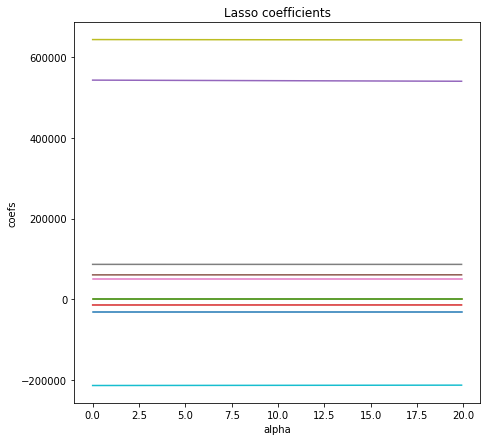

In [192]:
# get our independent and dependent variables
X = chall[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'lat', 'long']]
y = chall['price']

# function call for lasso function 
a = lass(X, y)
a.lass1()

In [206]:
# performing cross validation of ten folds
lasso = linear_model.Lasso() 
scores = cross_val_score(lasso, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# calculating the mean of the cross validation scores
print(f'Mean of cross validation scores is {np.sqrt(np.round(scores.mean()*-1, 3))}')

# calculating the variance of the cross validation scores from the mean
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 210680.4111983314
Standard deviation of the cross validation scores is 5303685110.405


The standard deviation here is also as large but smaller than that of the ridge.

### 5. Elastic Net Regression

In [193]:
# get our independent and dependent variables
X = chall[['bedrooms', 'bathrooms', 'sqft_living', 'floors', 'waterfront', 'view', 'condition', 'grade', 'lat', 'long']]
y = chall['price']

# run the function call to get the linear model
a = elastic(X, y)
a.line()

The MSE of this linear model is: 44187812972.14158
The RMSE of this linear model is:  210208.97452806713
{'bedrooms': -30462.54788816819, 'bathrooms': 1431.2856534387627, 'sqft_living': 200.8026731056077, 'floors': -14795.027970334151, 'waterfront': 595650.1438223892, 'view': 58329.979764857875, 'condition': 50758.70660754857, 'grade': 87631.35748806648, 'lat': 636200.0969231431, 'long': -221908.44910328783}


In [194]:
# run the function call to get the best alpha and ratio to use
a.el()

{'alpha': 1e-05, 'l1_ratio': 0.8}
44507401270.65602


In [195]:
# function that uses the above alpha and l1 ratio
def el1():
      elastic=ElasticNet(normalize=True,alpha=1e-05,l1_ratio=0.8)
      elastic.fit(X,y)
      second_model=(mean_squared_error(y_true=y,y_pred=elastic.predict(X)))
      print("The MSE of elastic regression with the best parameters:",second_model)
      print("The RMSE of this model:",np.sqrt(second_model))
      coef_dict_baseline = {}
      # loop to print the coefficients
      for coef, feat in zip(elastic.coef_,X.columns):
          coef_dict_baseline[feat] = coef
      print(coef_dict_baseline)
el1() 

The MSE of elastic regression with the best parameters: 44340015677.85943
The RMSE of this model: 210570.69045301492
{'bedrooms': -23261.27584691872, 'bathrooms': 13303.434595893996, 'sqft_living': 179.0825125790689, 'floors': -13768.756530113644, 'waterfront': 579014.2504851669, 'view': 60821.8111852388, 'condition': 49046.63712071675, 'grade': 88729.91361226427, 'lat': 616663.8888673547, 'long': -204791.40018452363}


In [196]:
# function call for the alpha as 0.001 and l1 ratio as 0.75
a.el2()

The MSE of elastic regression with alpha as 0.001: 89278075015.68864
The RMSE of this model: 298794.3691164354
{'bedrooms': 11874.762640115141, 'bathrooms': 27374.570679645887, 'sqft_living': 34.45909787204914, 'floors': 16293.123921042543, 'waterfront': 150301.26989566497, 'view': 24214.116591893464, 'condition': 5583.049021259737, 'grade': 25541.083665803944, 'lat': 120343.29407151017, 'long': -9116.799919886007}


In [204]:
# performing cross validation of ten fold
elastic=ElasticNet(normalize=True)
scores = cross_val_score(elastic, X, y, scoring = 'neg_mean_squared_error', cv = 10)

# calculating the mean of the cross validation scores
print(f'Mean of cross validation scores is {np.sqrt(np.round(scores.mean()*-1, 3))}')

# calculating the variance of the cross validation scores from the mean
print(f'Standard deviation of the cross validation scores is {np.round(scores.std(), 3)}')

Mean of cross validation scores is 367424.0084283674
Standard deviation of the cross validation scores is 16760185534.097


The standard deviation is the largest. It has the worst stability out of all lasso and ridge.

##7. Conclusion

How does the perfomance compare to the previous ones.

---
**Linear Regression**


1.   Model with no feature extraction had an RMSE of 195,608 and feature extraction had an RMSE of 205,673. The first model performed better.


---

**Quantile Regression**
1. Model with no feature extraction had a conditional number of 2.09e + 0.8 while that of the model with feature extraction had a conditional number of 1.06e + 0.5.The second model perfomed better.
---

**Ridge Regression**
1. With regularization ridge model with no feature extraction had an RMSE of 201,612.3 and an RMSE of 210,233.1 for the model with feature extraction. The first model performed better.
---
**Lasso Regression**
1. Model with no feature extraction had an RMSE of 200,807.3 and that with feature extraction had an RMSE of 210,458.8. The first model perfomed better.
---

**Elastic Net Regression**
1. Model with no feature extraction had an RMSE of 202,018.1 and that with feature extraction had an RMSE of 210,570.7. The first model performed better.
---




which is the better model? 
1. Linear model (no feature extraction)
2. Lasso model  (no feature extraction)
3. Ridge model  (no feature extraction)
4. Elastic Net model  (no feature extraction)


We can conclude that if we do our own feature selection the performance does not improve for all the regressions apart from quantile. This tells us that if we wanted to improve our predictions we would go for other complicated algorithms like decision trees and KNN. We can also use other prediction algorithms.

## OTHER REGRESSIONS

In [254]:
# Split the dataset into train and test sets
# find the best features to predict the price of a house
X = chall.drop('price', axis=1)
y = chall['price']

X_train, Y_train, X_test, Y_test = train_test_split(X,y, test_size = 0.2, random_state=0)


# Fit Linear Regression model to the dataset(this is optional. We are doing this for the sole purpose of comparing the linear regression model to the polynomial regression model)
reg_line = LinearRegression()
reg_line.fit(X,y)


# Fit polynomial Regression to the dataset
poly_reg = PolynomialFeatures(degree = 6) 
X_poly = poly_reg.fit_transform(X)
pol_reg = LinearRegression()
pol_reg.fit(X_poly, y)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [258]:
print("Polynomial regression at 6 degrees of freedom")
# Predict using linear regression
lin_pred = reg_line.predict([[3, 2.50, 1650, 2, 1, 0, 3, 7, 47.5234, -122.188]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[3, 2.50, 1650, 2, 1, 0, 3, 7, 47.5234, -122.188]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg.fit_transform(X))

Polynomial regression at 6 degrees of freedom
Linear prediction: 928317
Polynomial prediction: 732119


We observe that the predictions are not the same. In order to know how far off the prediction is we need to test with data we already know the results of.

In [261]:
# generate a random row to test our model
import random
n = random.randint(0, 21610)
chall.iloc[n]

price          450000.0000
bedrooms            2.0000
bathrooms           1.0000
sqft_living      1180.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           4.0000
grade               7.0000
lat                47.5893
long             -122.1350
Name: 19533, dtype: float64

We will use the above data to see if our model is accurate.

In [262]:
print("Polynomial regression at 6 degrees of freedom")
# Predict using linear regression
lin_pred = reg_line.predict([[2, 1, 1180, 1, 0, 0, 4, 7, 47.5893, -122.1350]])
print('Linear prediction: %d' %lin_pred)

# Predict using Polynomial Regression
poly_pred = pol_reg.predict(poly_reg.fit_transform([[2, 1, 1180, 1, 0, 0, 4, 7, 47.5893, -122.1350]]))
print('Polynomial prediction: %d' %poly_pred)

# We can also get the predictions as an array
poly_arr_pred = pol_reg.predict(poly_reg.fit_transform(X))

Polynomial regression at 6 degrees of freedom
Linear prediction: 362323
Polynomial prediction: 409784


Both models failed to correctly predict the price, but polynomial regression was close to the actual figure. We therefore get the RMSE of polynomial regression and compare that to our other models.

In [268]:
poly_mean = mean_squared_error(y_true=y,y_pred= pol_reg.predict(poly_reg.fit_transform(X)))
poly_RMSE = np.sqrt(poly_mean)
print("The mean squared error for polynomial regression is:", poly_mean)
print("The RMSE of polynomial regression is:", poly_RMSE)

The mean squared error for polynomial regression is: 22946690503.377197
The RMSE of polynomial regression is: 151481.65071511862


We clearly see that polynomial regression outperformed all our models even though it is not accurate. We believe this can be fine tuned with hyperparameter tuning. We recommend the use of other regression models.